# EDA - Topic Analysis

##### Grace Chen

## Load Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("preliminary_data/GNI88.csv")

In [3]:
data.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Source Religion,Legacy Source Tag,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group
0,2018-01-10,3759306,North Korea makes deals and threats,7023849,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
1,2018-01-10,3759306,North Korea makes deals and threats,7023842,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
2,2018-01-10,3759306,North Korea makes deals and threats,7023839,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
3,2018-01-10,3759306,North Korea makes deals and threats,7023833,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
4,2018-01-10,3759306,North Korea makes deals and threats,7023846,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['artdate', 'Article ID', 'Headline', 'Quote ID', 'Article Status',
       'Article Position', 'Messages', 'Submessages', 'Quote Position',
       'Legacy Quote Tag', 'On/Off Message', 'QText', 'Source Name',
       'Source Type', 'Source Party Affiliation', 'Source Ethnicity',
       'Source Nationality', 'Source Gender', 'Source Religion',
       'Legacy Source Tag', 'Constituent Group', 'Media Name', 'Media Medium',
       'Journalist Name', 'Constituent Author', 'Article Issues',
       'Custom Group', 'Media Group'],
      dtype='object')

### Understanding Columns 

In [5]:
data["On/Off Message"].unique() # whether something is on or off message?
# only for constituent group 

array([nan, 'Not On Message', 'On Message'], dtype=object)

In [6]:
data["QText"].head() # the quote text itself 
# 1) sometimes quote itself, sometimes more 
# 2) for opinion articles, take excerpts 

0    the nuclear issue was separate and that Pyongy...
1    the country's "cutting-edge" nuclear weapons a...
2                            That was not on the table
3    All our cutting-edge weapons, including our hy...
4    despite the quibbles, Tuesday's discussions we...
Name: QText, dtype: object

In [7]:
data["Constituent Group"].unique()[:5] # = group that speaker is affiliated with?
# if nuke organizations, who the speaker belows to 

array(['None (Legacy Other)', nan,
       'Center for Strategic and International Studies',
       'National Iranian American Council',
       'Federation of American Scientists'], dtype=object)

In [8]:
data["Constituent Author"].unique()[:5] # What is the difference with above?
# not important probably

array([nan, 'Constituent Author'], dtype=object)

In [9]:
data["Custom Group"].unique()[:10] # Difference with Constituent Group?
# additional info maybe

array([nan, 'HI Missile Scare', 'Op-Ed', 'Inter-Korean Summit 2018',
       'Crimea', 'Donald Trump - Nukes Reference', 'Editorial',
       'Nuclear Summit 2016', "Iran's plot", 'Nuclear Summit 2014'],
      dtype=object)

In [10]:
data["Article Issues"].unique()[:10] # Also topic of classification?
# similar to custom groups, article level tag 

array([nan, 'Proliferation', 'Proliferation, Foreign Policy Narrative',
       'Iran', 'Iran, Missile Defense', 'Iran, Proliferation',
       'Politics, Spending', 'Proliferation, Spending', 'Missile Defense',
       'Iran, Politics'], dtype=object)

In [11]:
data["Media Group"].unique() # what does it mean?
# Beltway/capitol hill for political 

array([nan, 'Capitol Hill Media', 'Beltway'], dtype=object)

In [12]:
data["Legacy Quote Tag"].unique()
# carried over 

array([nan, 'Grand List', 'Off-Message'], dtype=object)

## Select Topic Related Columns

In [13]:
topic_data = data[['artdate', 'Article ID', 'Headline', 'Quote ID', 'Article Status',
       'Article Position', 'Messages', 'Submessages', 'Quote Position', 'QText', 'Media Name', 
        'Media Medium', 'Article Issues', 'Custom Group']]

In [14]:
topic_data.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,QText,Media Name,Media Medium,Article Issues,Custom Group
0,2018-01-10,3759306,North Korea makes deals and threats,7023849,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,the nuclear issue was separate and that Pyongy...,Washington Post,NaN,NaN,NaN
1,2018-01-10,3759306,North Korea makes deals and threats,7023842,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,"the country's ""cutting-edge"" nuclear weapons a...",Washington Post,NaN,NaN,NaN
2,2018-01-10,3759306,North Korea makes deals and threats,7023839,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,That was not on the table,Washington Post,NaN,NaN,NaN
3,2018-01-10,3759306,North Korea makes deals and threats,7023833,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,"All our cutting-edge weapons, including our hy...",Washington Post,NaN,NaN,NaN
4,2018-01-10,3759306,North Korea makes deals and threats,7023846,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,"despite the quibbles, Tuesday's discussions we...",Washington Post,NaN,NaN,NaN


In [15]:
topic_data["Messages"].unique()

array(['OLD Proliferation', 'OLD Arms Reduction', 'OLD Missile Defense',
       'OLD Spending', 'OLD Foreign Policy Narrative', nan, 'OLD Iran',
       'OLD Other', 'OLD Sequestration', 'US Nuclear and Missile Policy',
       'North Korea', 'Arms Reduction', 'Iran', 'China',
       'Nuclear Consequences', 'India', 'KSA', 'Russia', 'Pakistan',
       'Israel', 'Turkey'], dtype=object)

In [16]:
message_counts = topic_data[["Article ID", "Messages"]].groupby(["Messages"]).count()
message_counts

,Article ID
Messages,
Arms Reduction,18692
China,1821
India,75
Iran,4544
Israel,99
KSA,45
North Korea,3853
Nuclear Consequences,1166
OLD Arms Reduction,17638


<AxesSubplot:xlabel='Messages'>

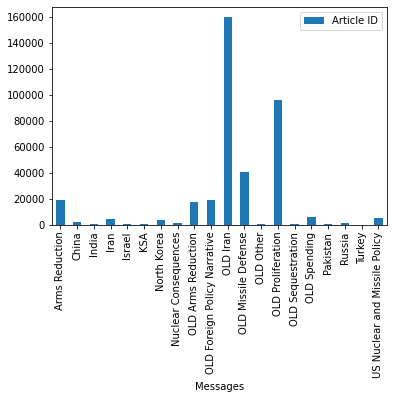

In [17]:
message_counts.plot(kind='bar')

### Organize into years 

In [18]:
topic_data["artdate"].unique()

array(['2018-01-10', '2018-02-02', '2018-01-16', ..., '2020-03-15',
       '2020-04-04', '2013-05-05'], dtype=object)

In [19]:
topic_data[["year", "month", "day"]] = topic_data["artdate"].str.split("-", expand = True)
topic_data.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/4184813770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_data[["year", "month", "day"]] = topic_data["artdate"].str.split("-", expand = True)
/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/4184813770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_data[["year", "month", "day"]] = topic_data["artdate"].str.split("-", expand = True)
/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/4184813770.p

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,QText,Media Name,Media Medium,Article Issues,Custom Group,year,month,day
0,2018-01-10,3759306,North Korea makes deals and threats,7023849,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,the nuclear issue was separate and that Pyongy...,Washington Post,NaN,NaN,NaN,2018,01,10
1,2018-01-10,3759306,North Korea makes deals and threats,7023842,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,"the country's ""cutting-edge"" nuclear weapons a...",Washington Post,NaN,NaN,NaN,2018,01,10
2,2018-01-10,3759306,North Korea makes deals and threats,7023839,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,That was not on the table,Washington Post,NaN,NaN,NaN,2018,01,10
3,2018-01-10,3759306,North Korea makes deals and threats,7023833,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,"All our cutting-edge weapons, including our hy...",Washington Post,NaN,NaN,NaN,2018,01,10
4,2018-01-10,3759306,North Korea makes deals and threats,7023846,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,"despite the quibbles, Tuesday's discussions we...",Washington Post,NaN,NaN,NaN,2018,01,10


In [20]:
years = topic_data["year"].unique()
years.sort()
years

array(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'], dtype=object)

In [21]:
def draw_messages_freq_bar_plot_by_yr(yr):
    topic_by_yr = topic_data[topic_data["year"] == yr]
    message_counts = topic_by_yr[["Article ID", "Messages"]].groupby(["Messages"]).count()
    message_counts.plot(kind = 'barh')

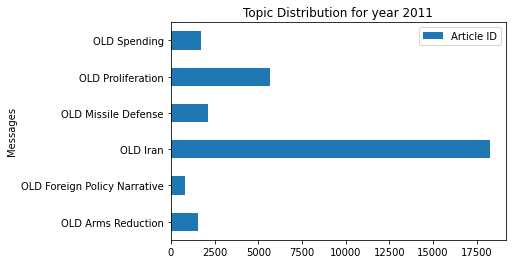

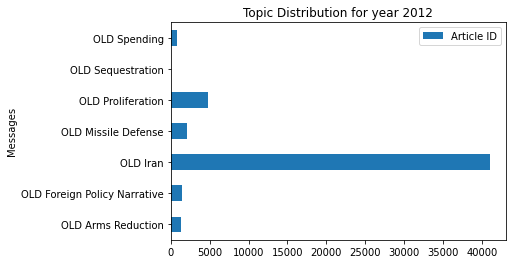

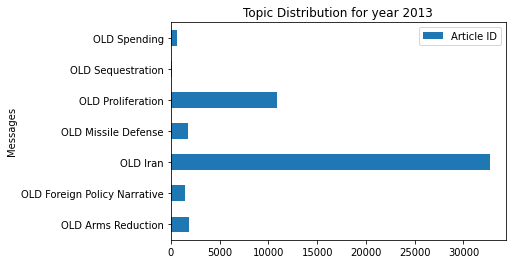

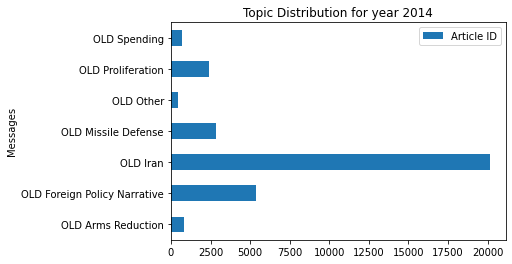

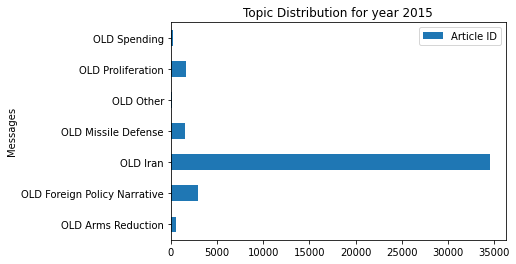

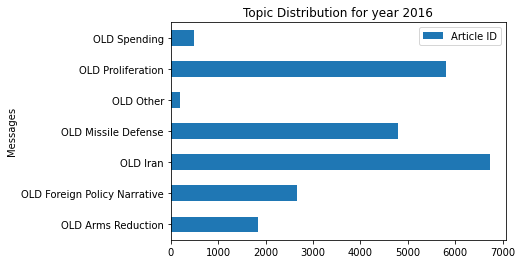

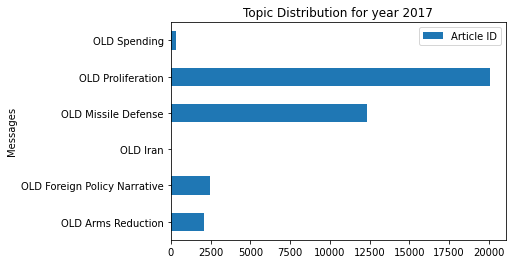

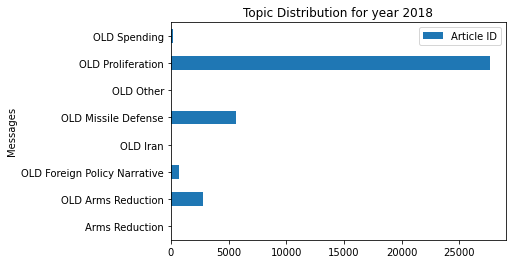

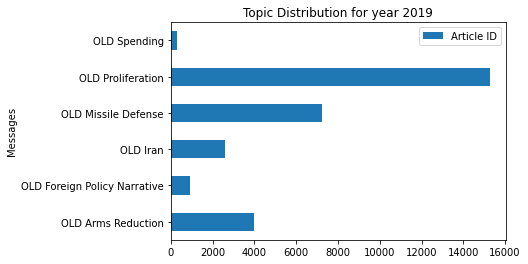

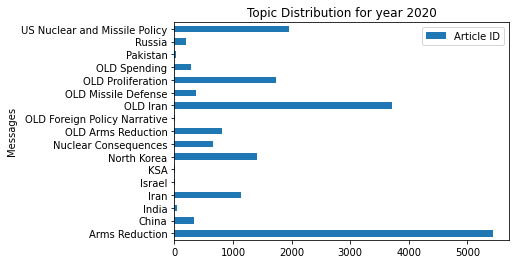

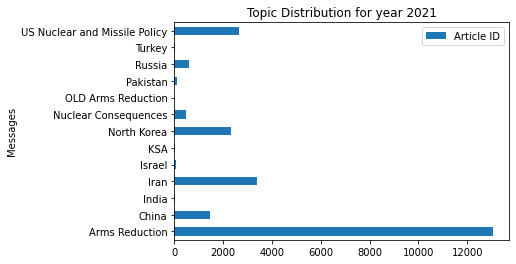

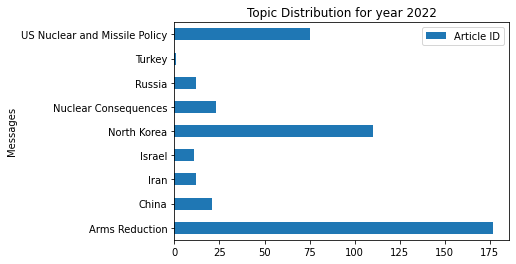

In [31]:
for yr in years:
    draw_messages_freq_bar_plot_by_yr(yr)
    plt.title("Topic Distribution for year " + yr)

In [32]:
topics = topic_data[["Messages"]].dropna()["Messages"].unique()
topics

array(['OLD Proliferation', 'OLD Arms Reduction', 'OLD Missile Defense',
       'OLD Spending', 'OLD Foreign Policy Narrative', 'OLD Iran',
       'OLD Other', 'OLD Sequestration', 'US Nuclear and Missile Policy',
       'North Korea', 'Arms Reduction', 'Iran', 'China',
       'Nuclear Consequences', 'India', 'KSA', 'Russia', 'Pakistan',
       'Israel', 'Turkey'], dtype=object)

In [33]:
def draw_year_freq_bar_plot_by_topic(topic):
    data_by_topic = topic_data[topic_data["Messages"] == topic]
    year_counts = data_by_topic[["Article ID", "year"]].groupby("year").count()
    year_counts.plot(kind = 'bar')

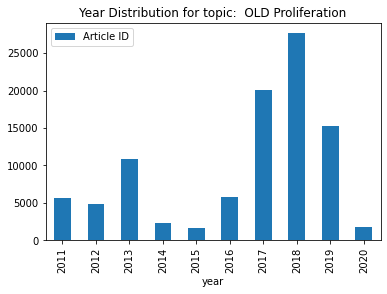

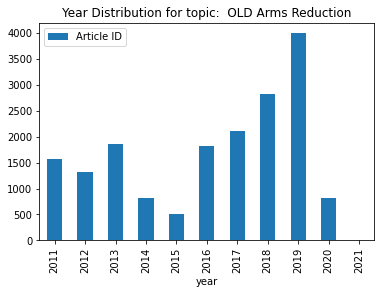

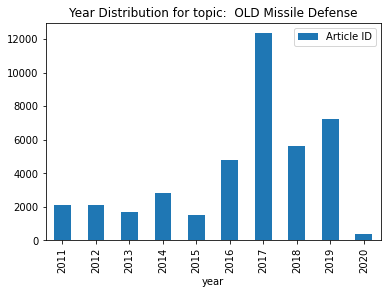

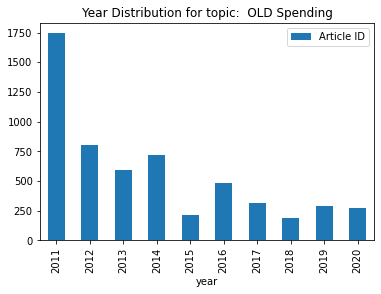

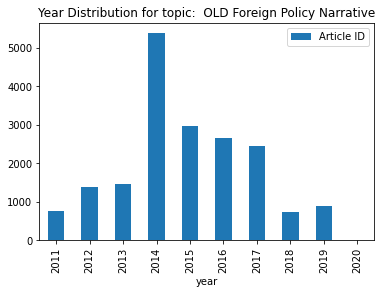

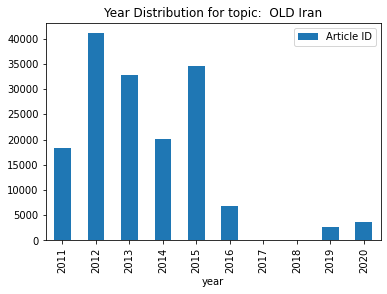

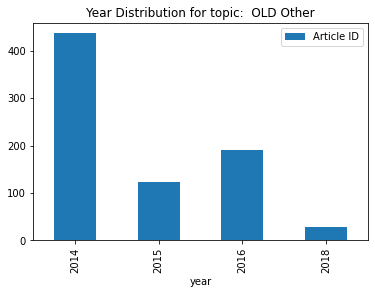

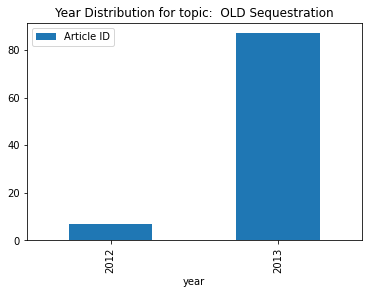

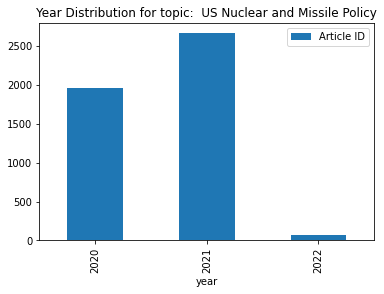

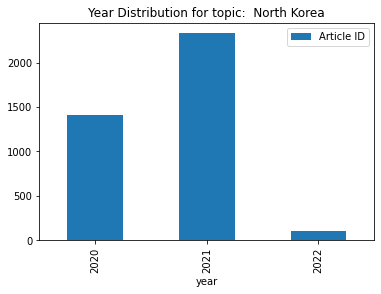

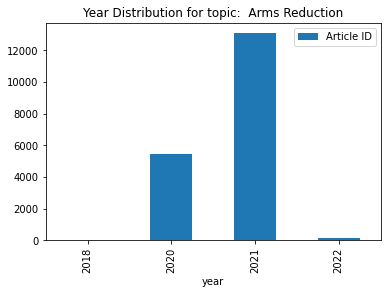

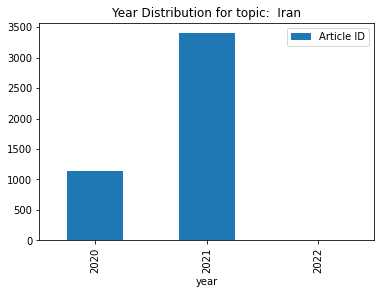

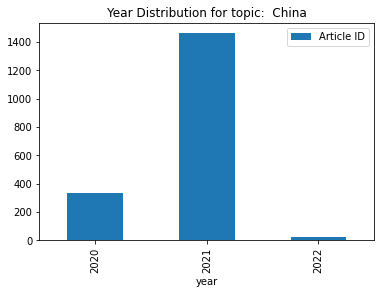

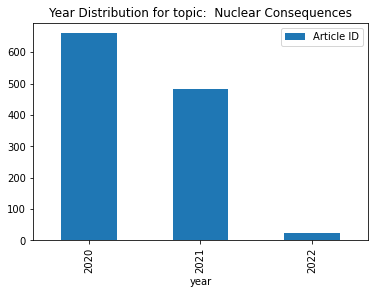

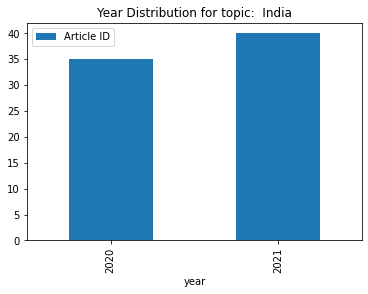

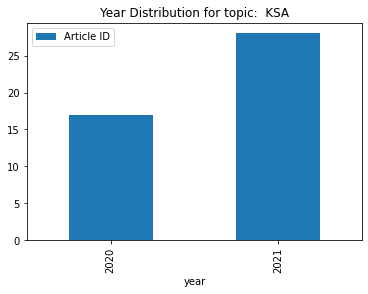

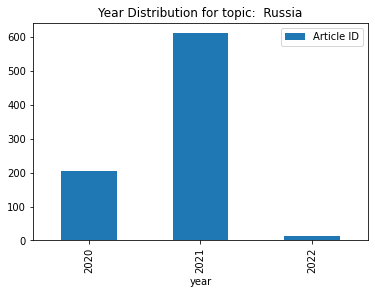

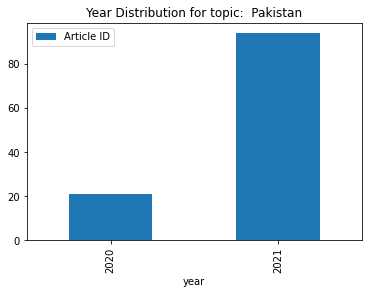

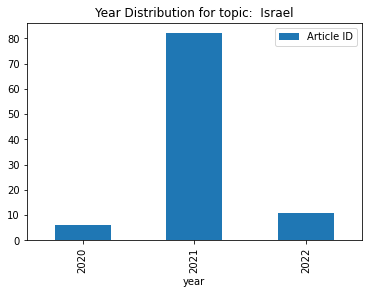

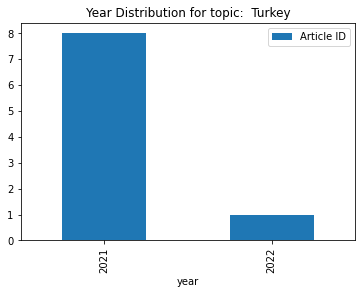

In [34]:
for t in topics:
    draw_year_freq_bar_plot_by_topic(t)
    plt.title("Year Distribution for topic:  " + t)

In [35]:
# messages_year_df = topic_data[["Messages", "year", "Article ID"]].groupby(["Messages", "year"]).count()
# messages_year_df = messages_year_df.rename(columns = {"Article ID":"Count"})
# messages_year_df = messages_year_df.unstack('year')
# messages_year_df

# messages_year_df = pd.pivot_table(topic_data[["Messages", "year", "Article ID"]],index = 'Messages',
 #columns = 'year',aggfunc ='count')

In [36]:
messages_year_df = pd.pivot_table(topic_data, values = 'Article ID', index = 'Messages', columns = 'year',
               aggfunc = 'count')

<AxesSubplot:xlabel='Messages'>

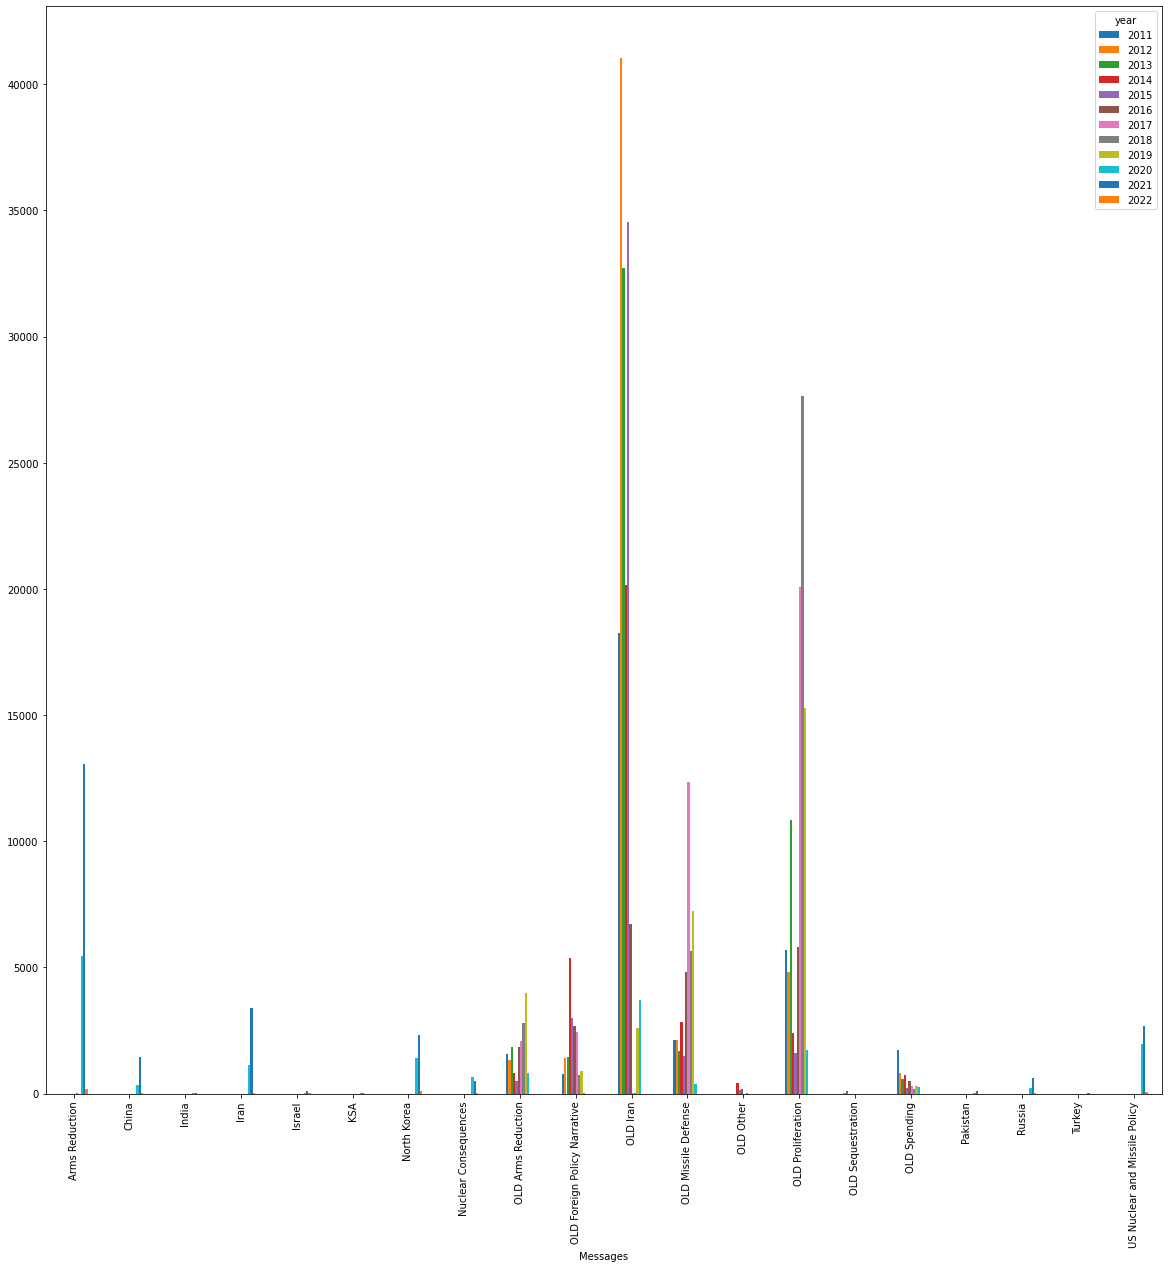

In [37]:
messages_year_df.plot(kind = "bar", figsize = (20,20))

<AxesSubplot:xlabel='year', ylabel='count'>

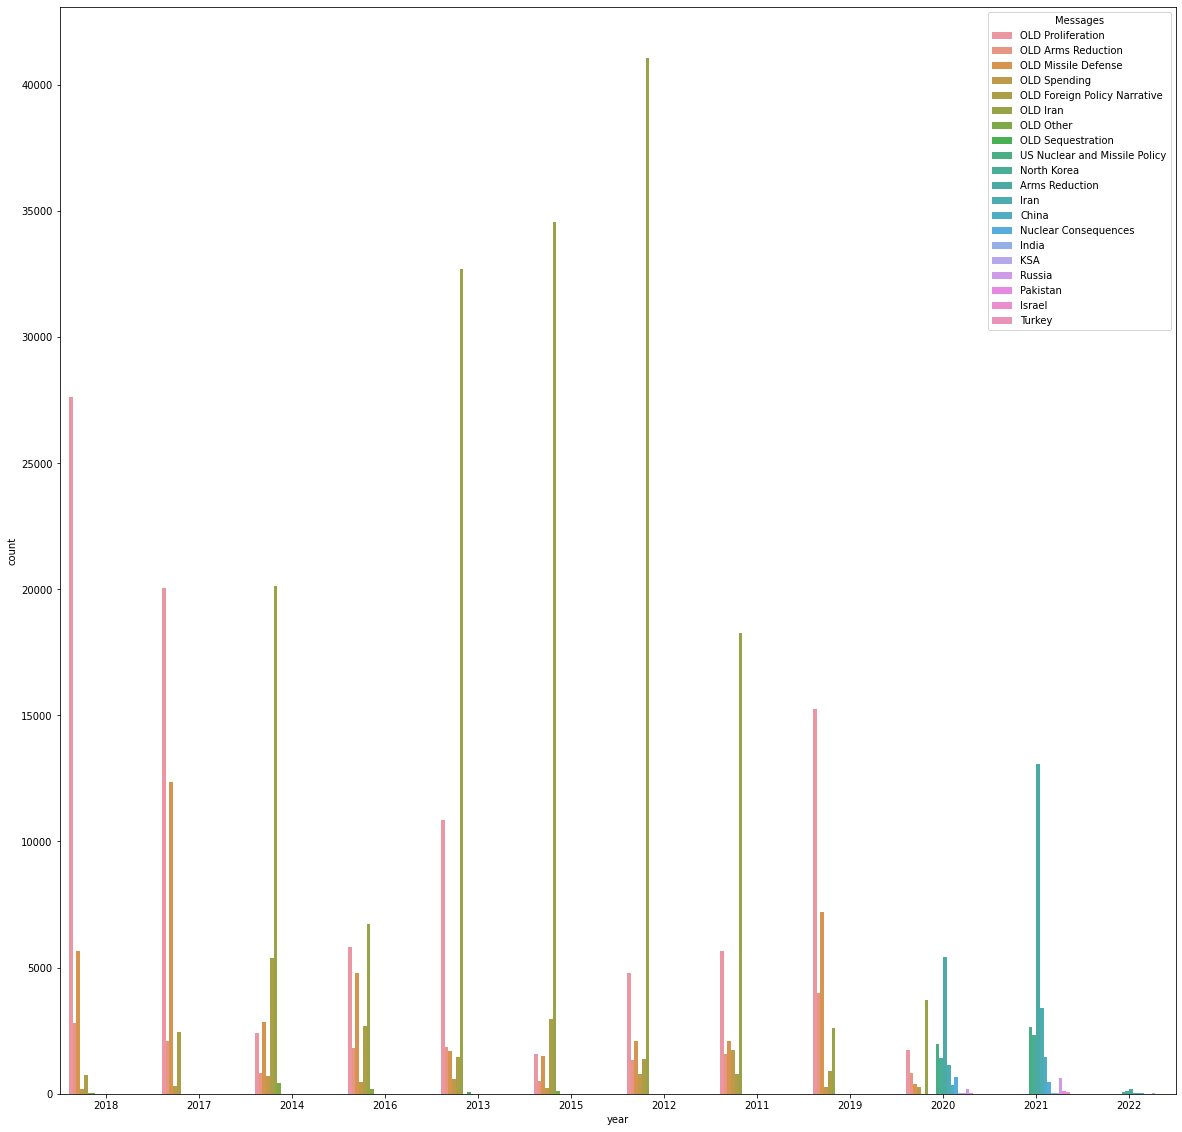

In [38]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.countplot(data=topic_data,x='year',hue='Messages')

## Years and Submessages

In [39]:
print(years)
print(topics)

['2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020'
 '2021' '2022']
['OLD Proliferation' 'OLD Arms Reduction' 'OLD Missile Defense'
 'OLD Spending' 'OLD Foreign Policy Narrative' 'OLD Iran' 'OLD Other'
 'OLD Sequestration' 'US Nuclear and Missile Policy' 'North Korea'
 'Arms Reduction' 'Iran' 'China' 'Nuclear Consequences' 'India' 'KSA'
 'Russia' 'Pakistan' 'Israel' 'Turkey']


<AxesSubplot:xlabel='Submessages'>

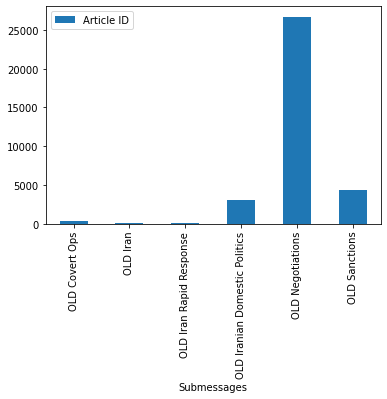

In [40]:
df_yr_topic = topic_data[(topic_data["year"] == '2015') & (topic_data["Messages"] == 'OLD Iran')]
df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
df_yr_topic.plot(kind = 'bar')

In [41]:
def draw_subtopic_freq_plot(yr, topic):
    df_yr_topic = topic_data[(topic_data["year"] == yr) & (topic_data["Messages"] == topic)]
    df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
    df_yr_topic.plot(kind = 'bar')

/opt/homebrew/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


IndexError: index 0 is out of bounds for axis 0 with size 0

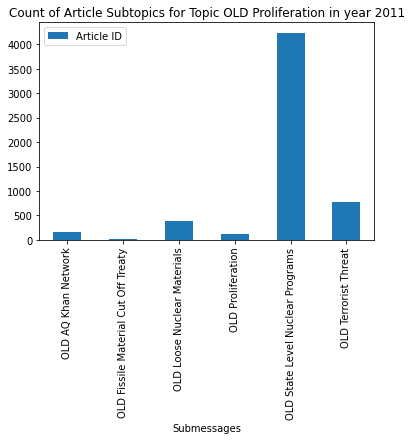

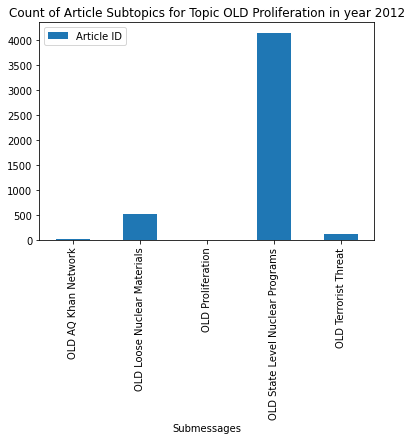

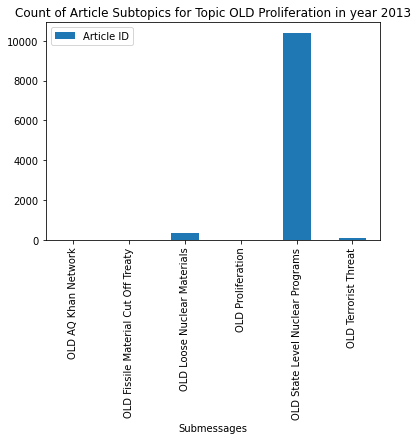

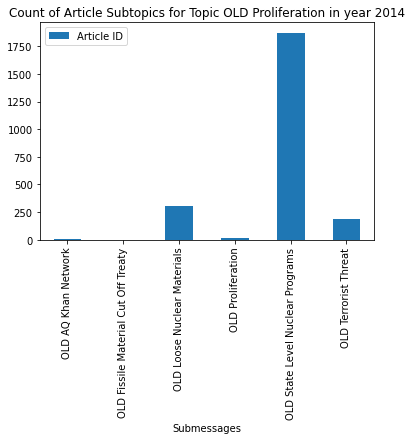

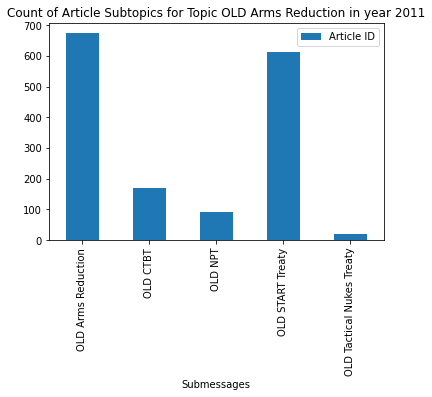

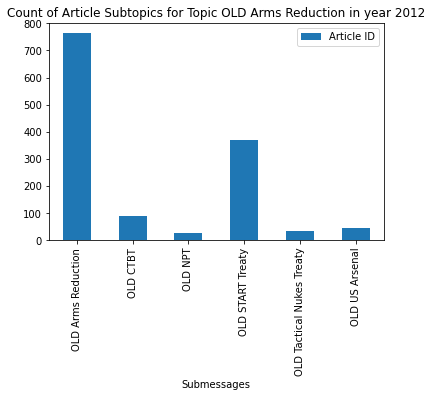

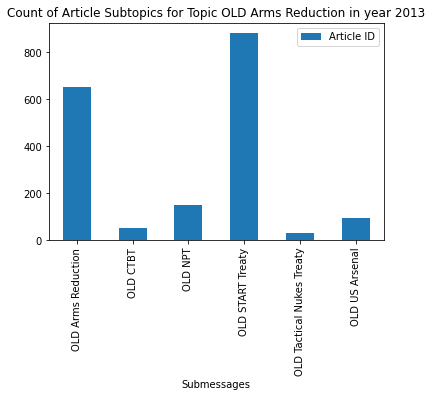

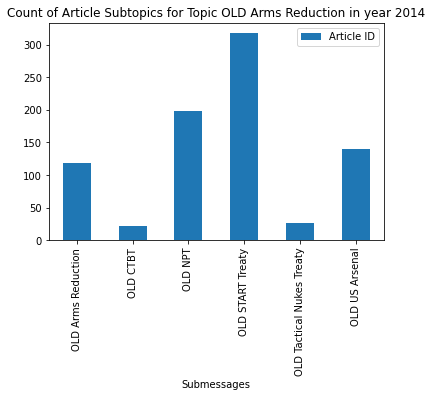

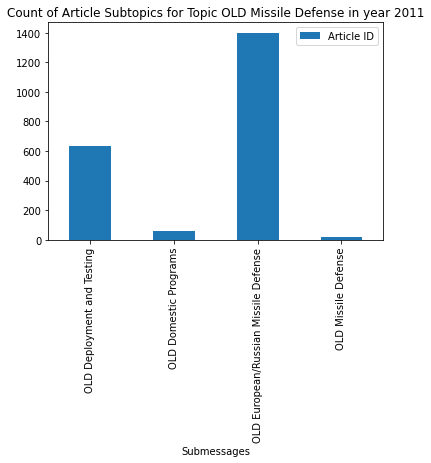

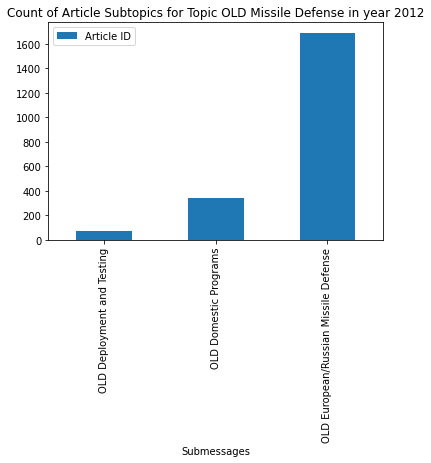

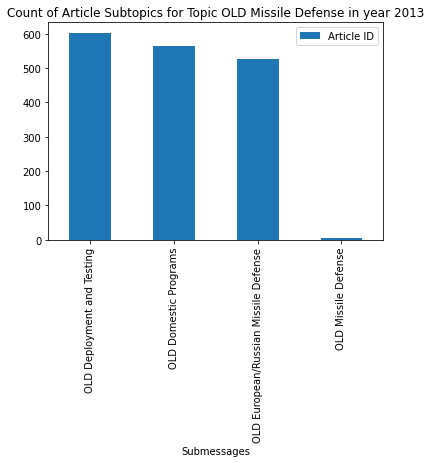

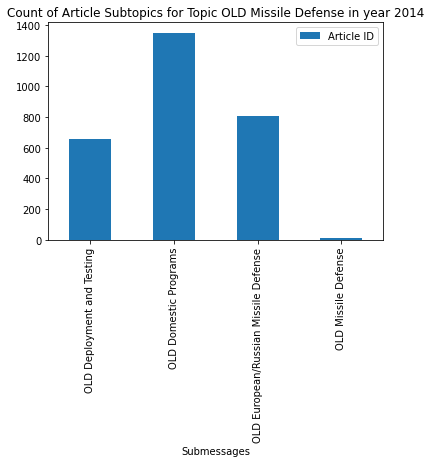

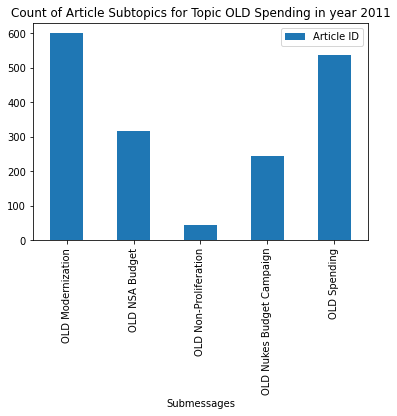

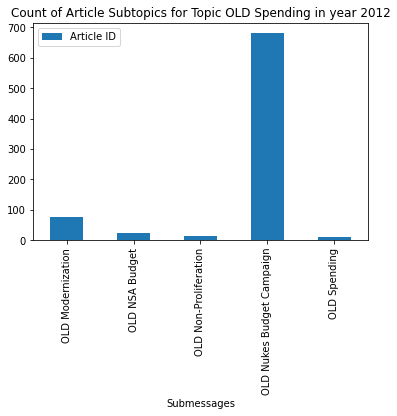

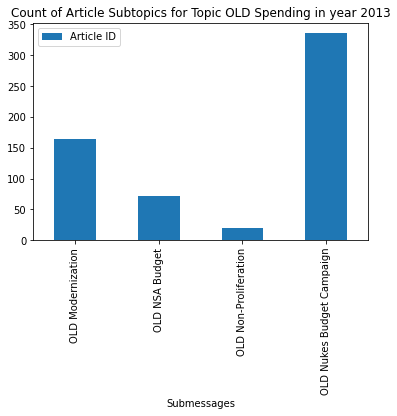

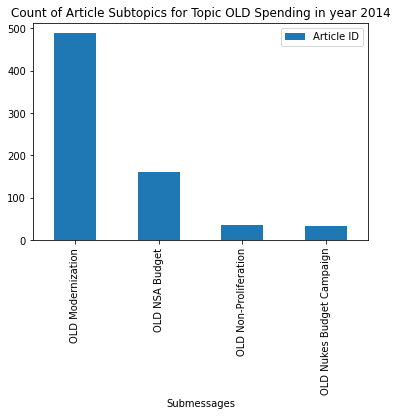

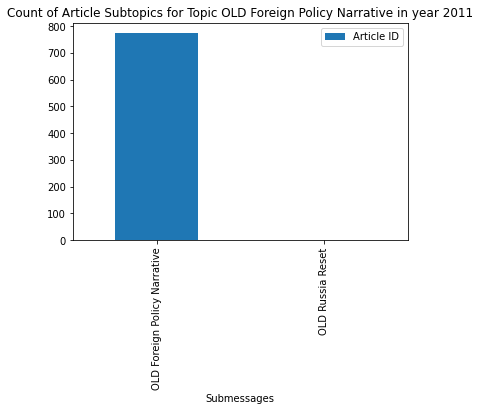

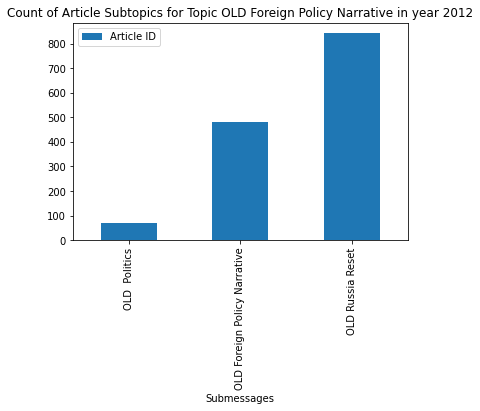

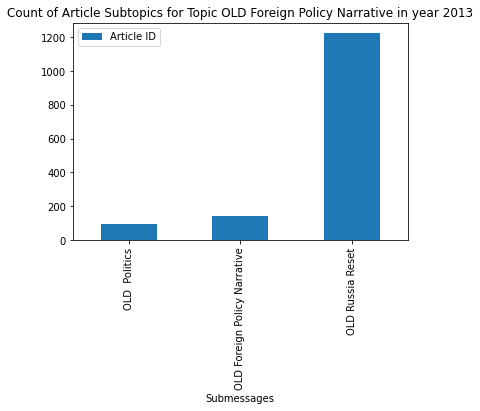

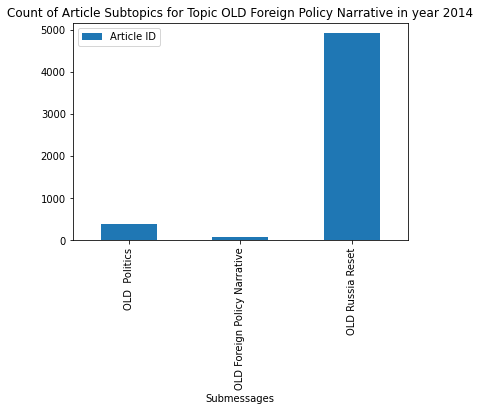

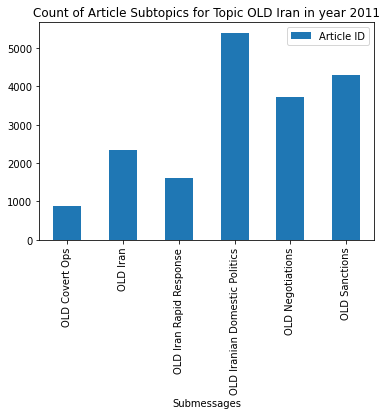

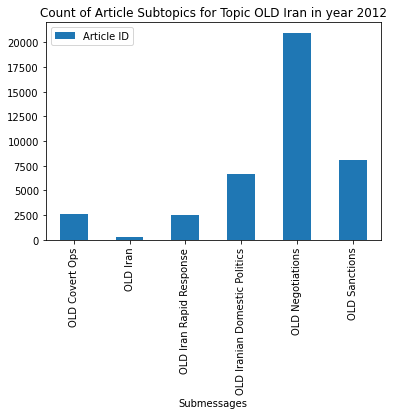

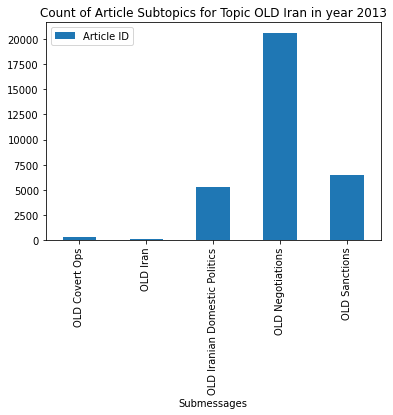

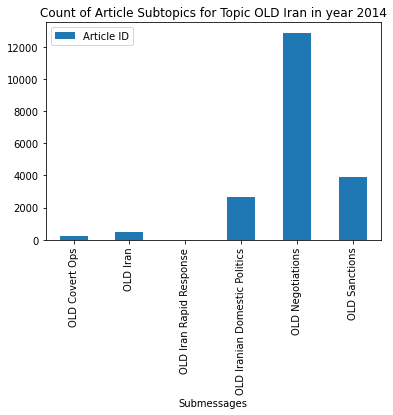

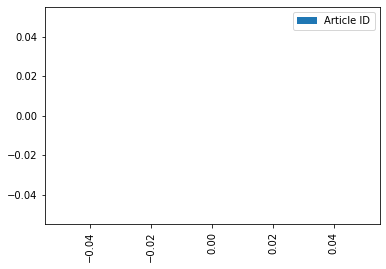

In [42]:
for t in topics:
    for yr in years[:4]:
        draw_subtopic_freq_plot(yr, t)
        plt.title("Count of Article Subtopics for Topic " + t + " in year " + yr)

In [43]:
len(topics)

20

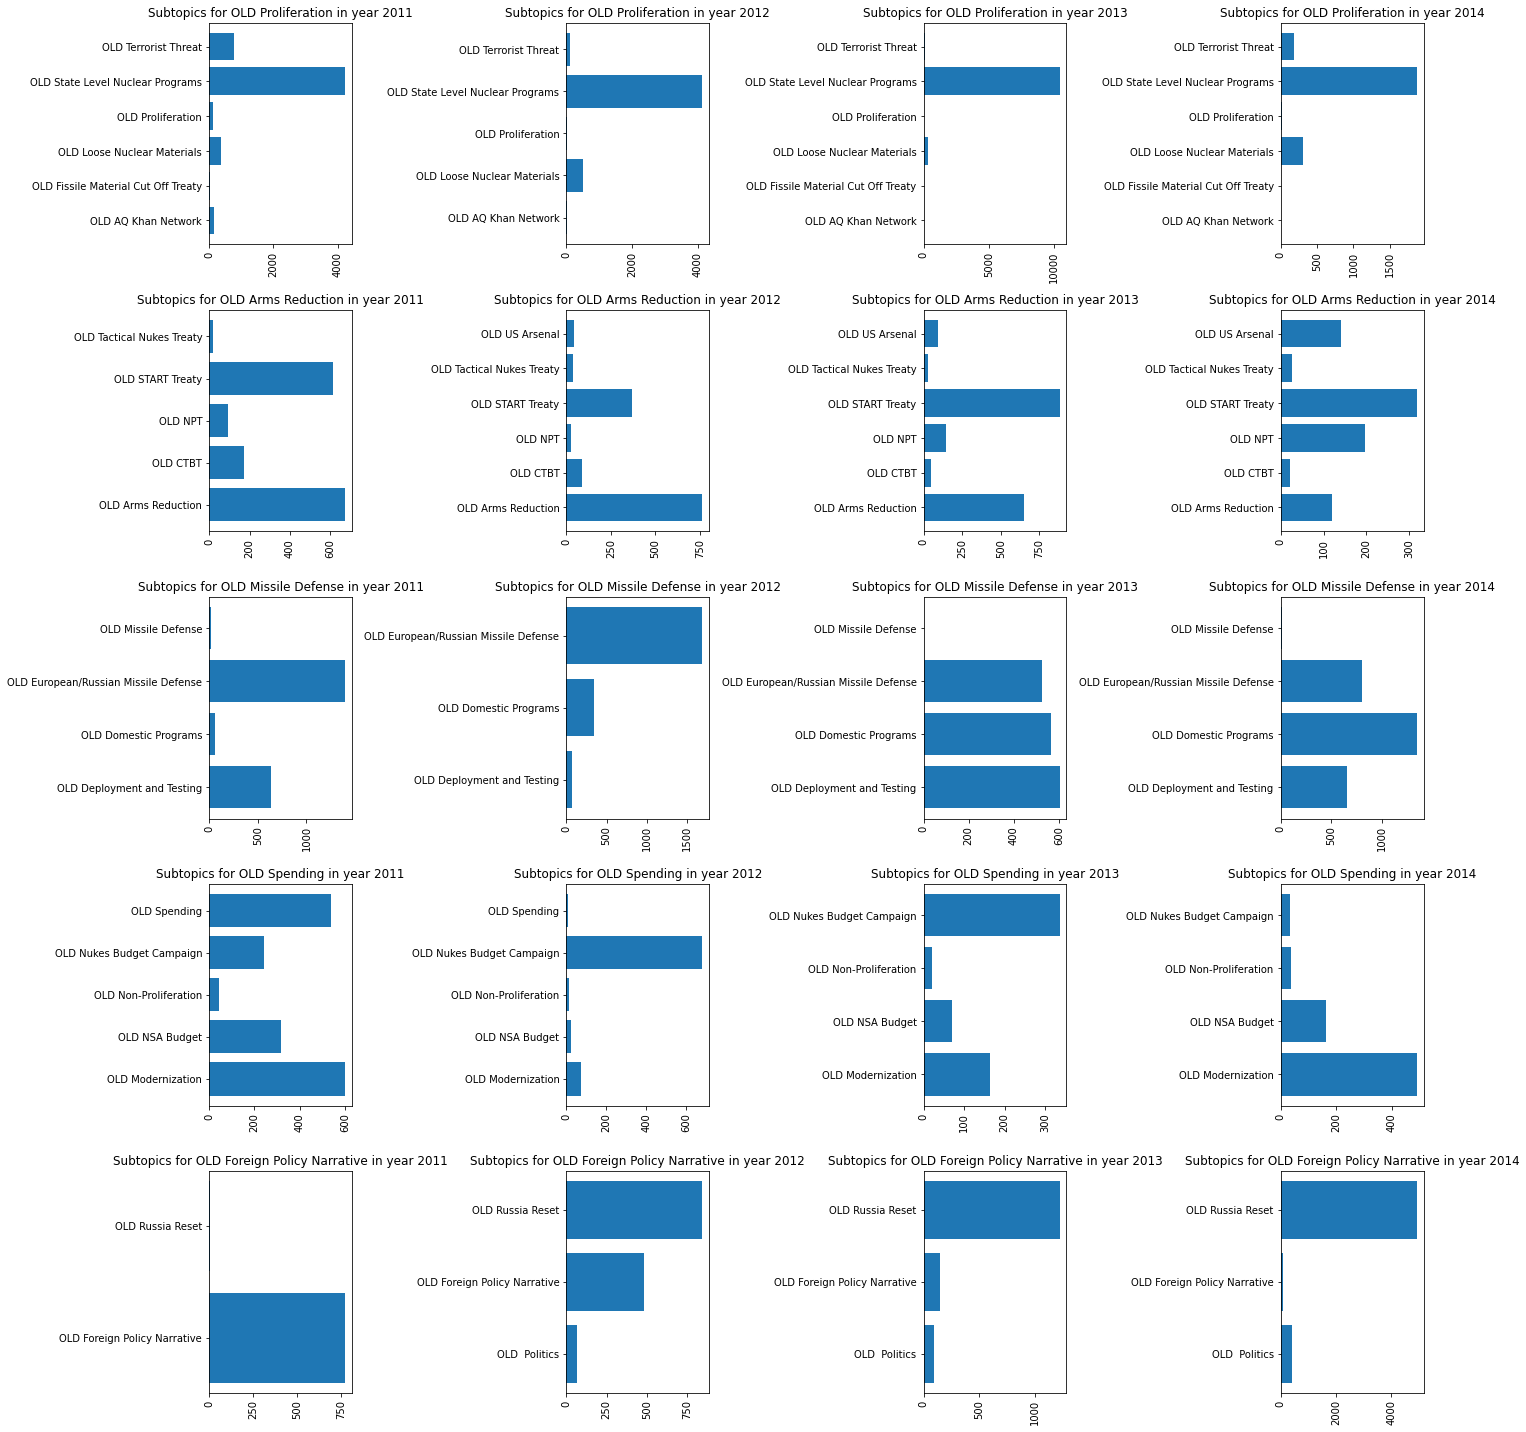

In [44]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i]
        year = years[j]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

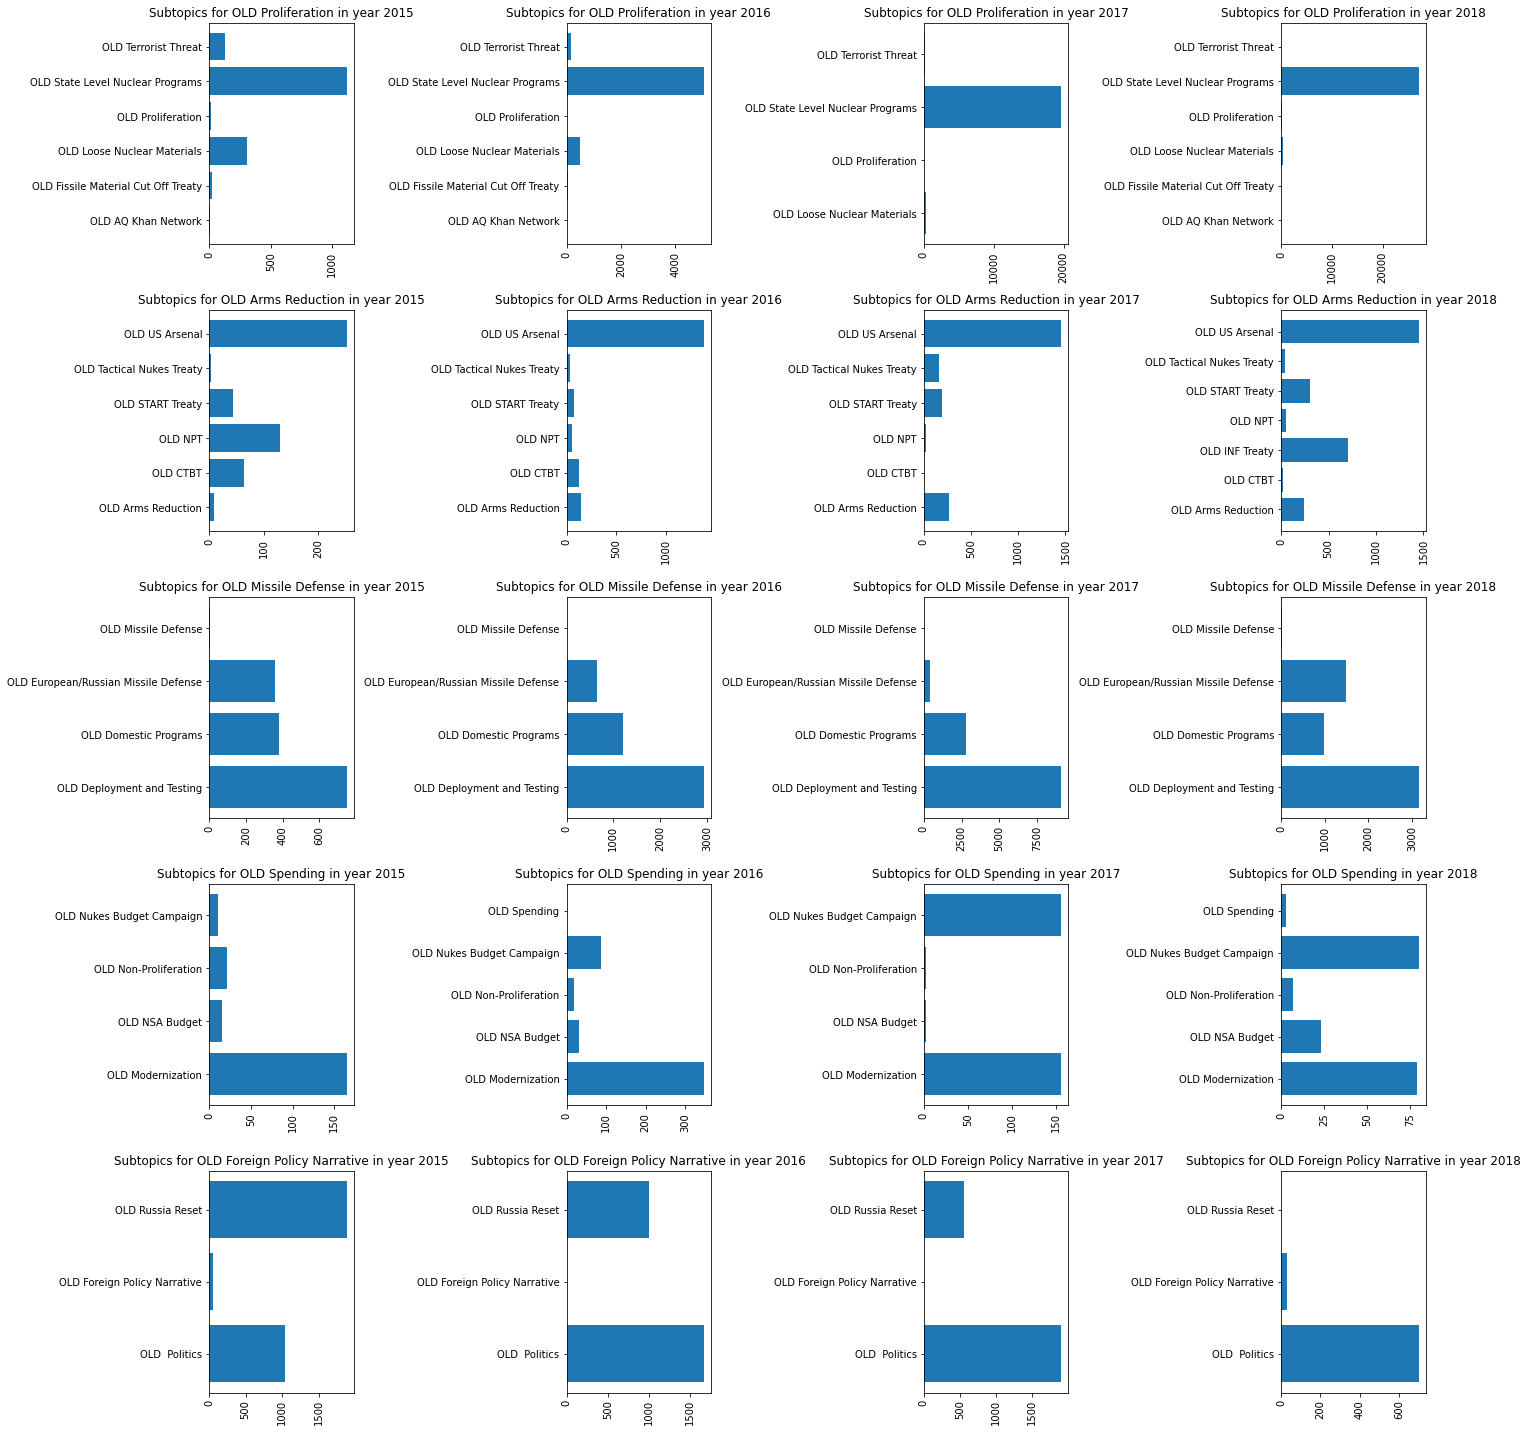

In [45]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i]
        year = years[j+4]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

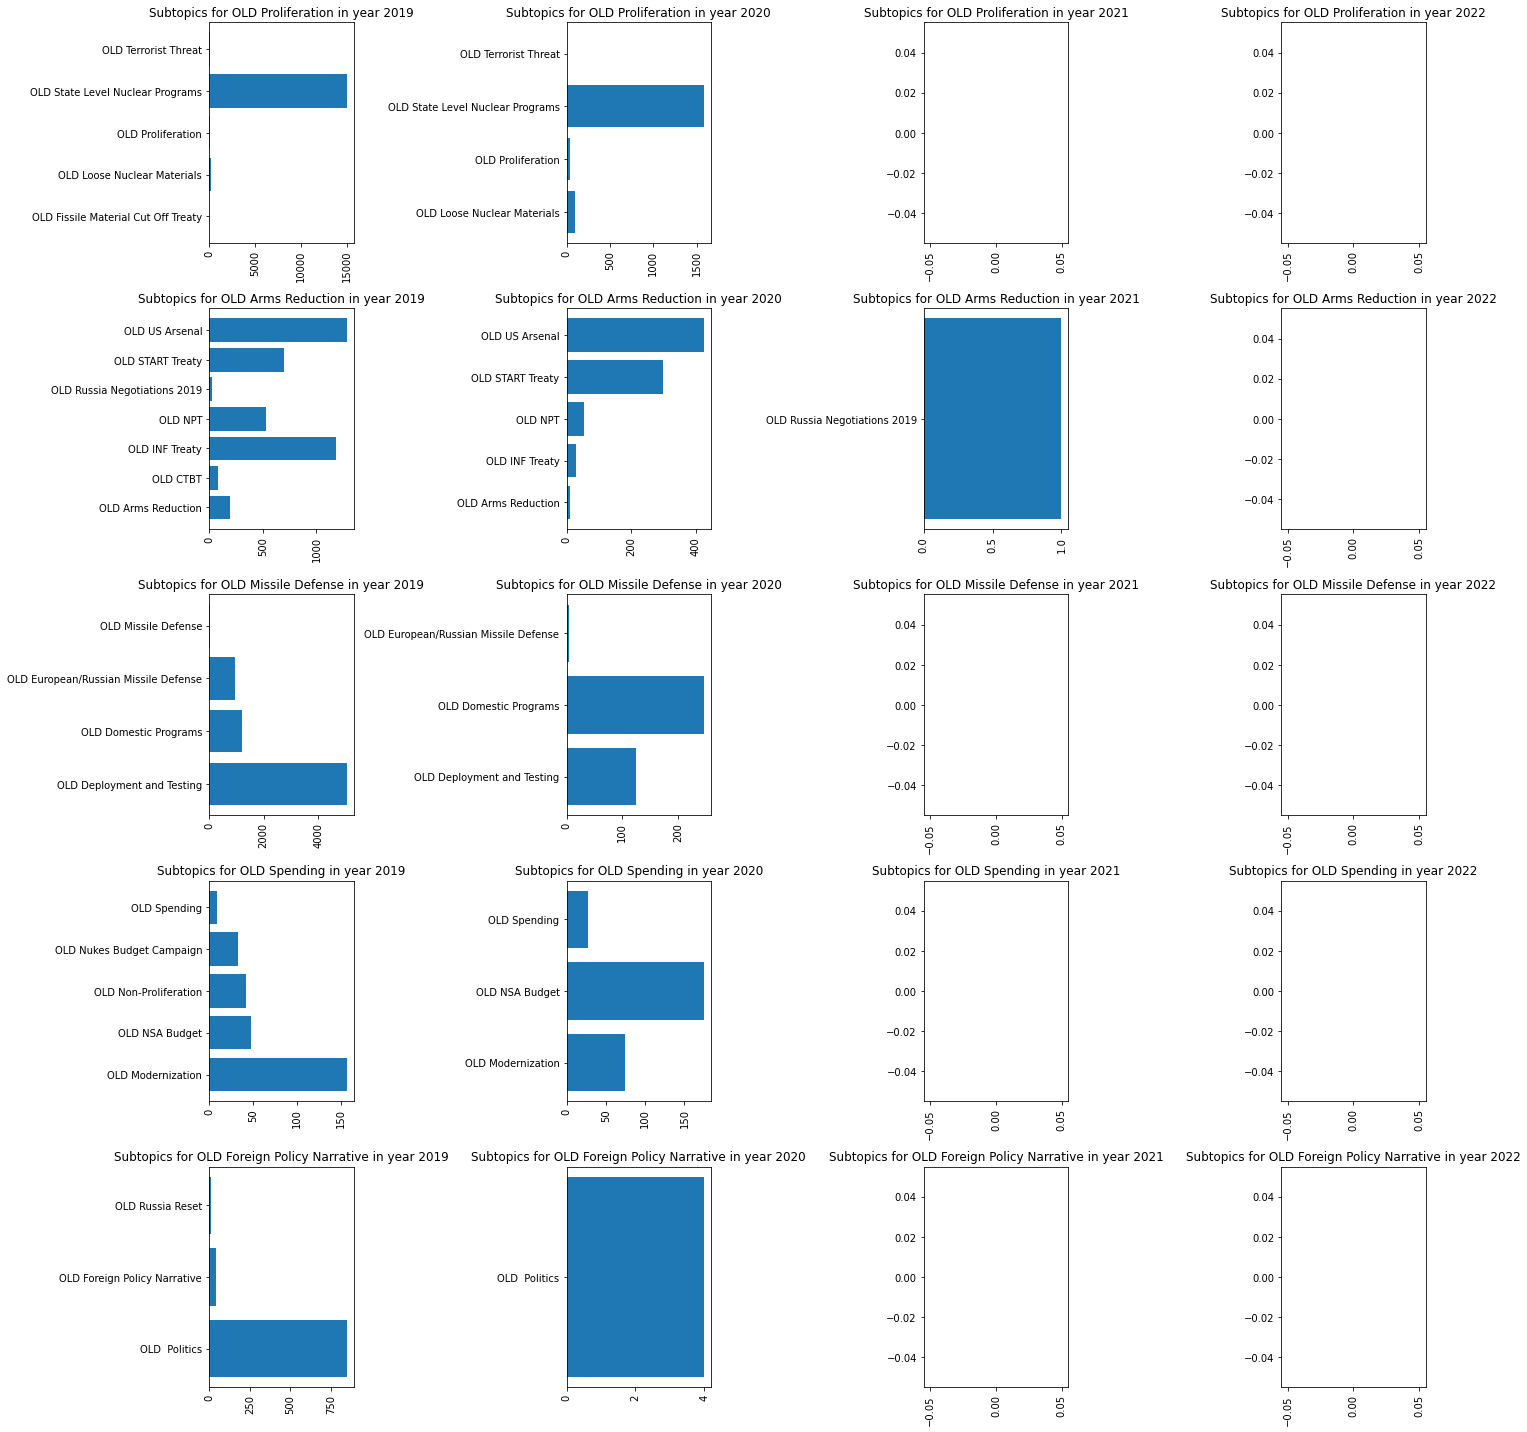

In [46]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i]
        year = years[j+8]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

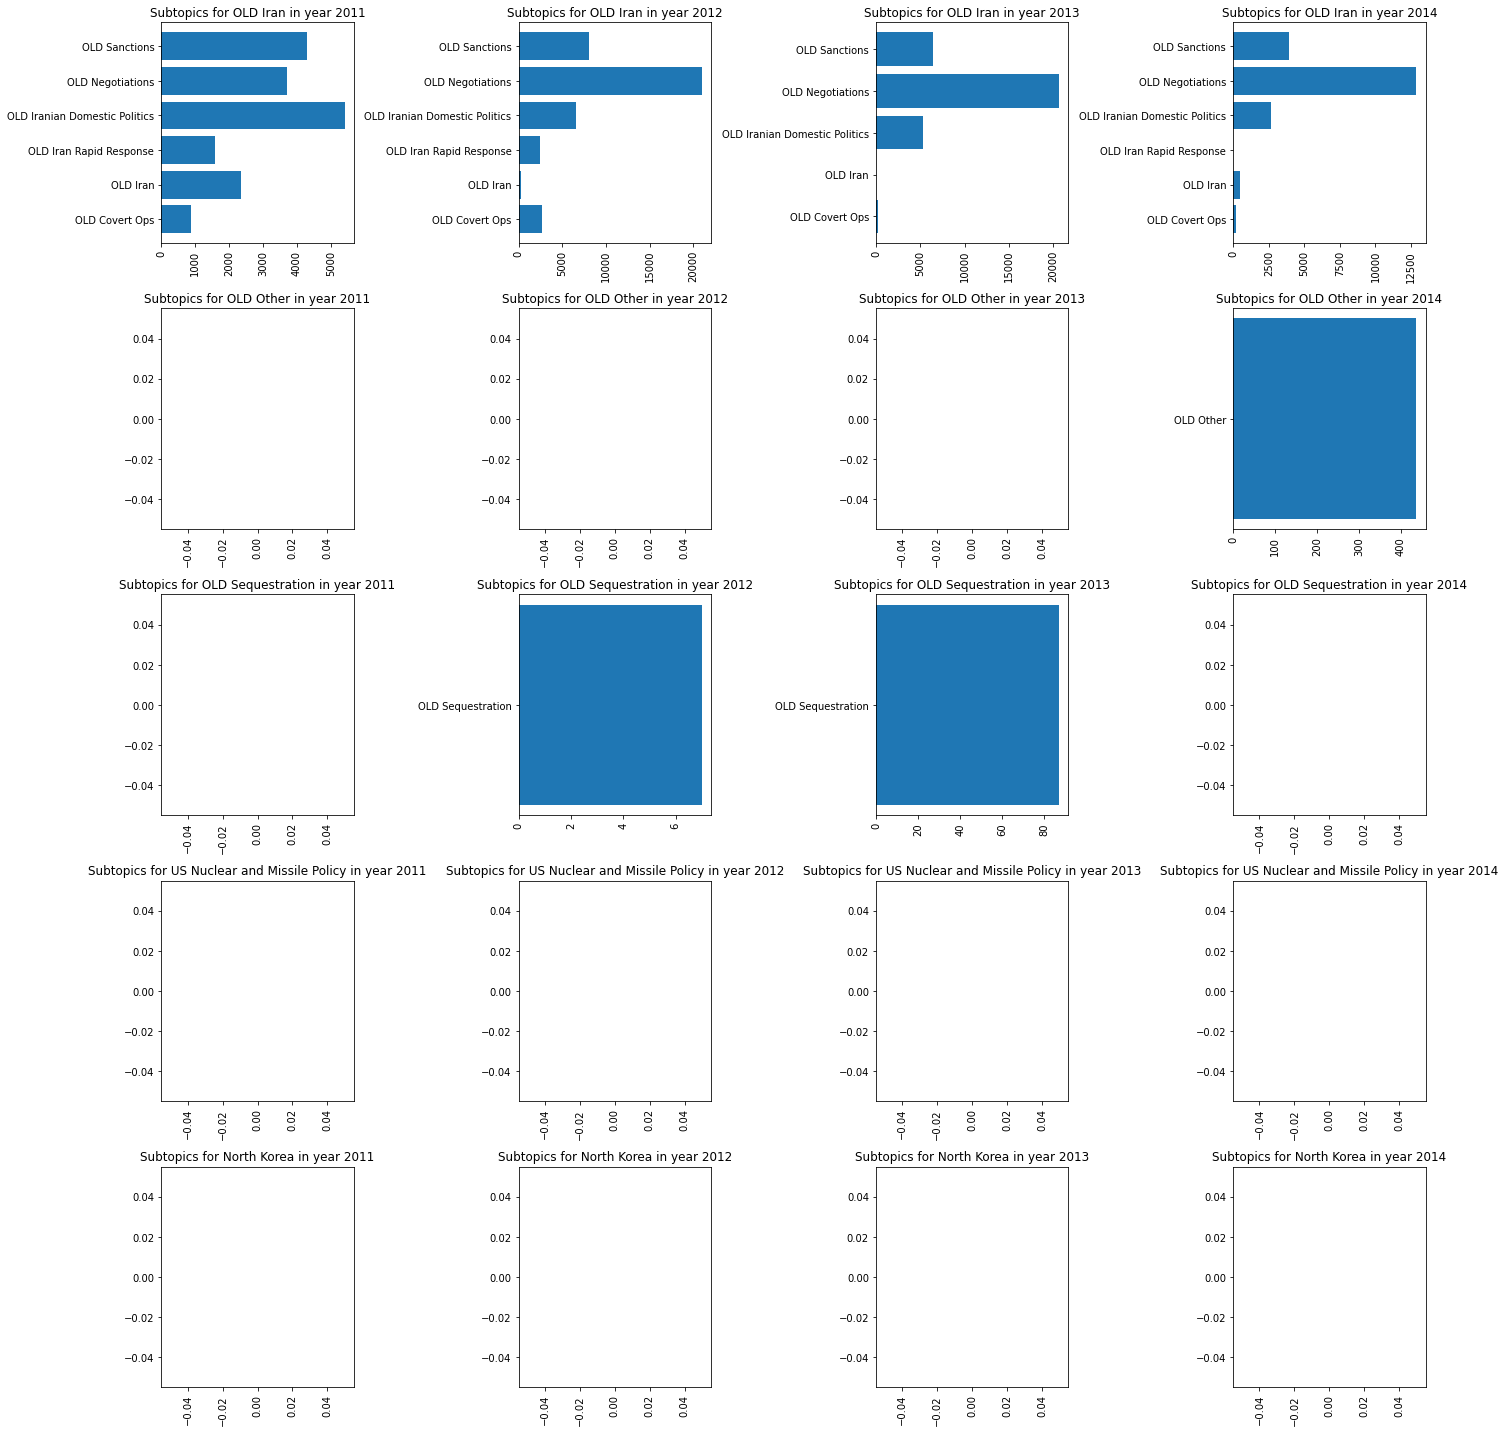

In [47]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i+5]
        year = years[j]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

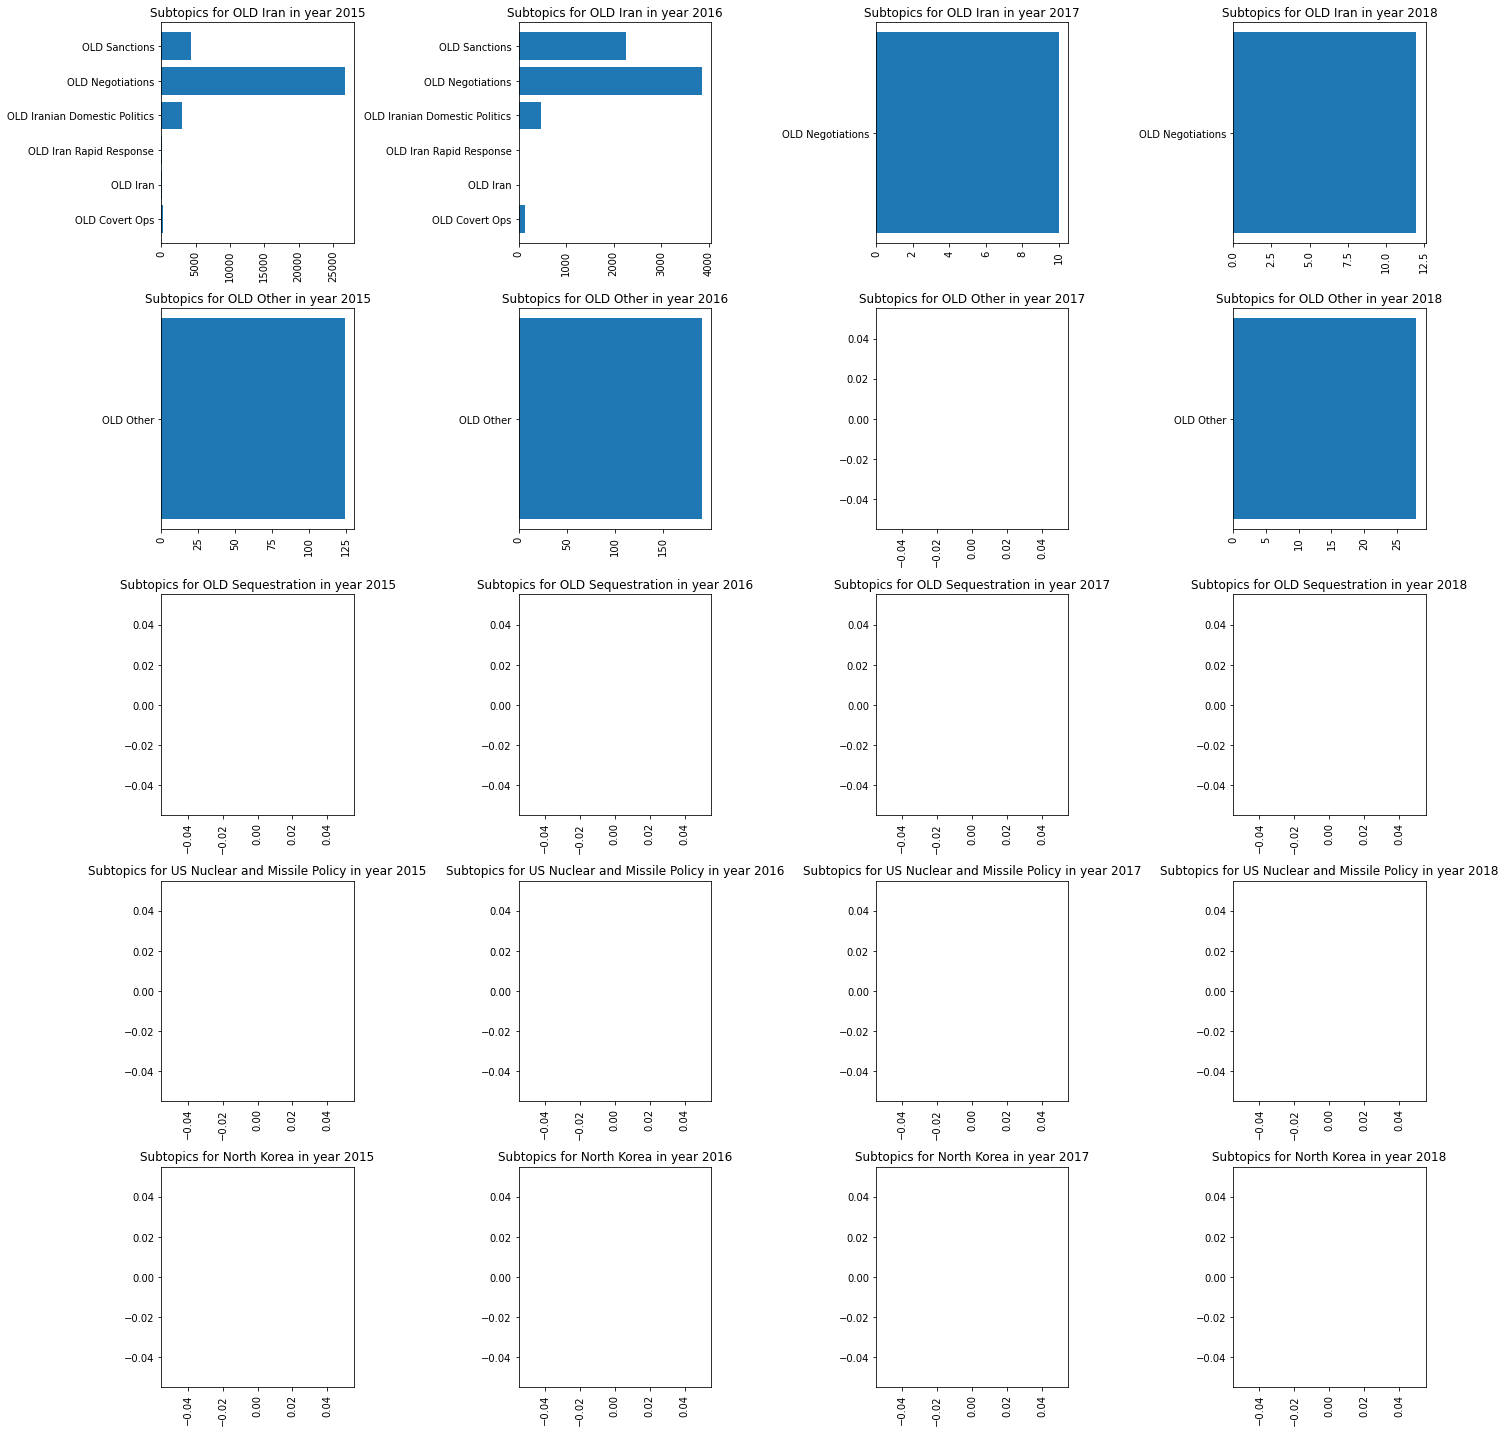

In [48]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i+5]
        year = years[j+4]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

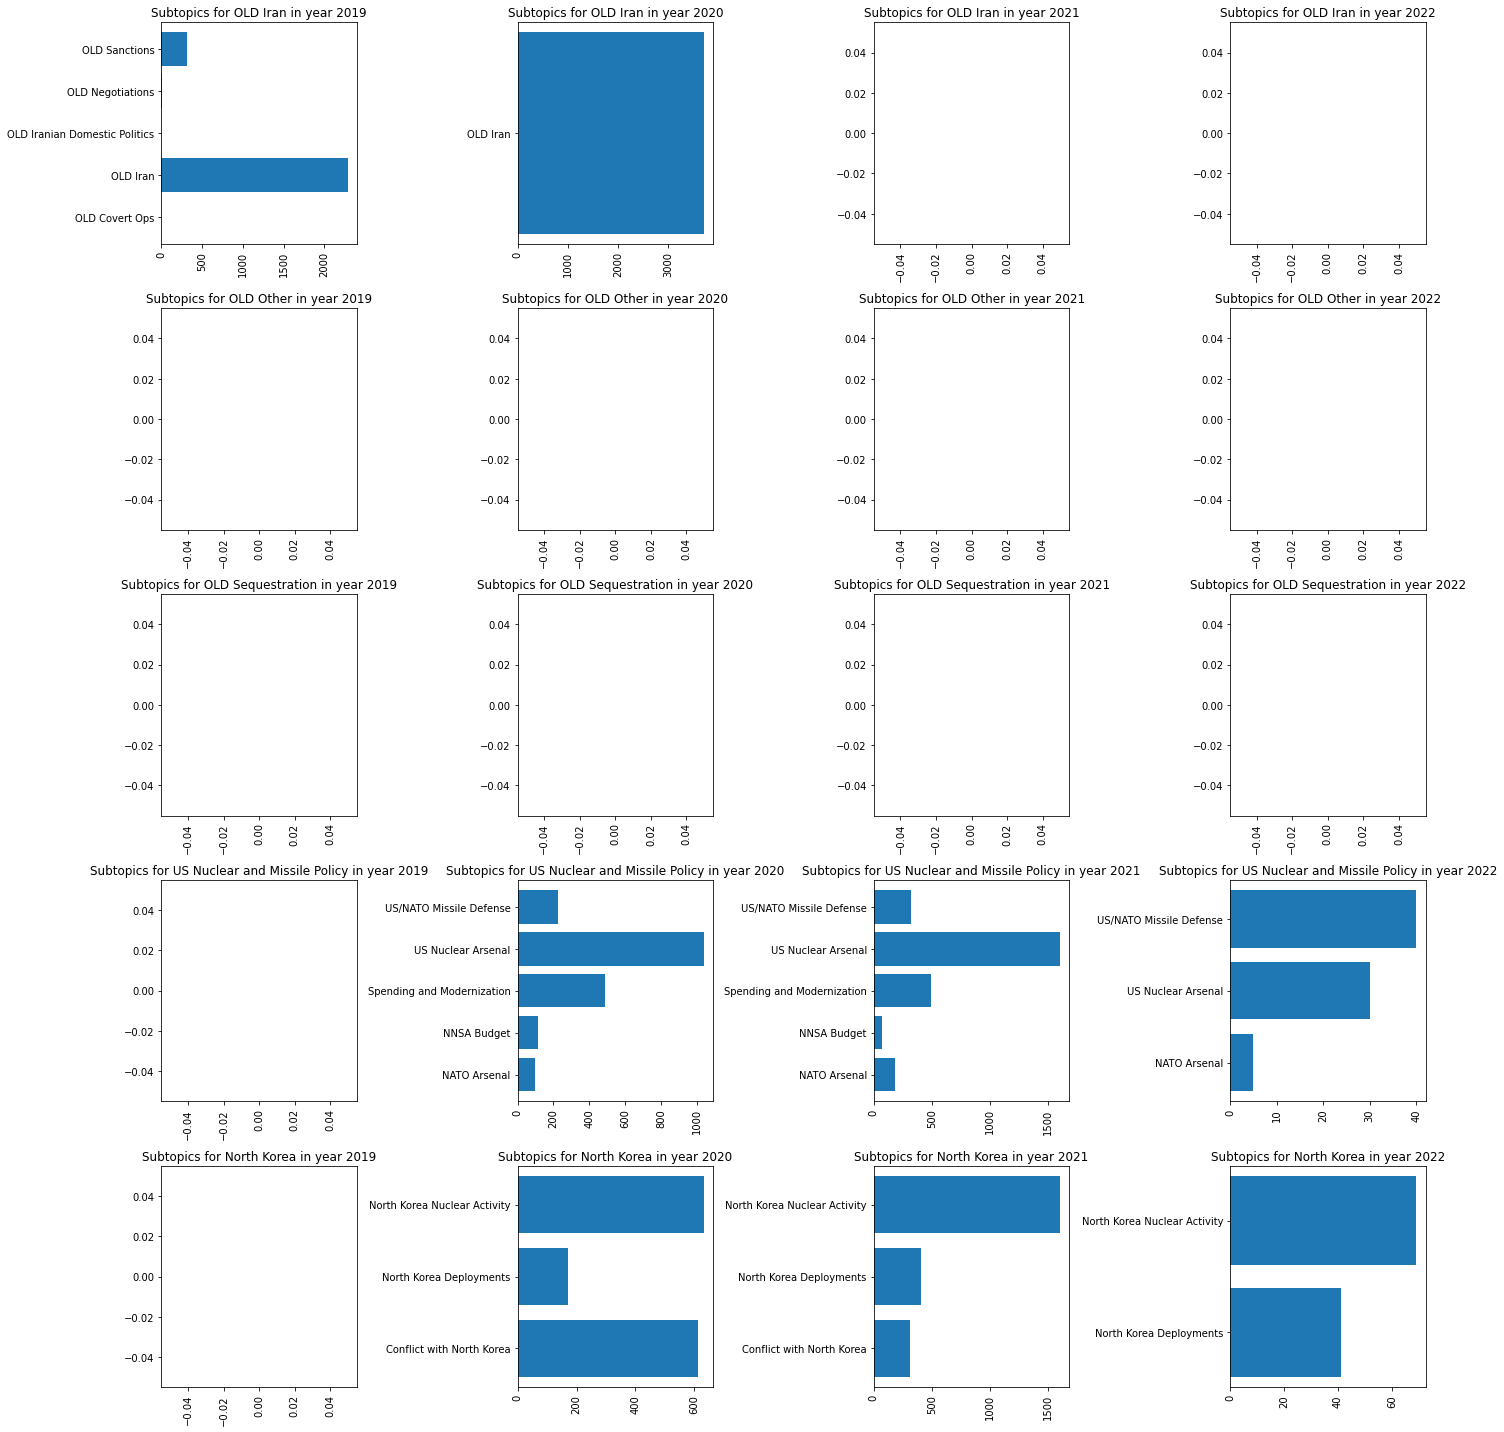

In [49]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i+5]
        year = years[j+8]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

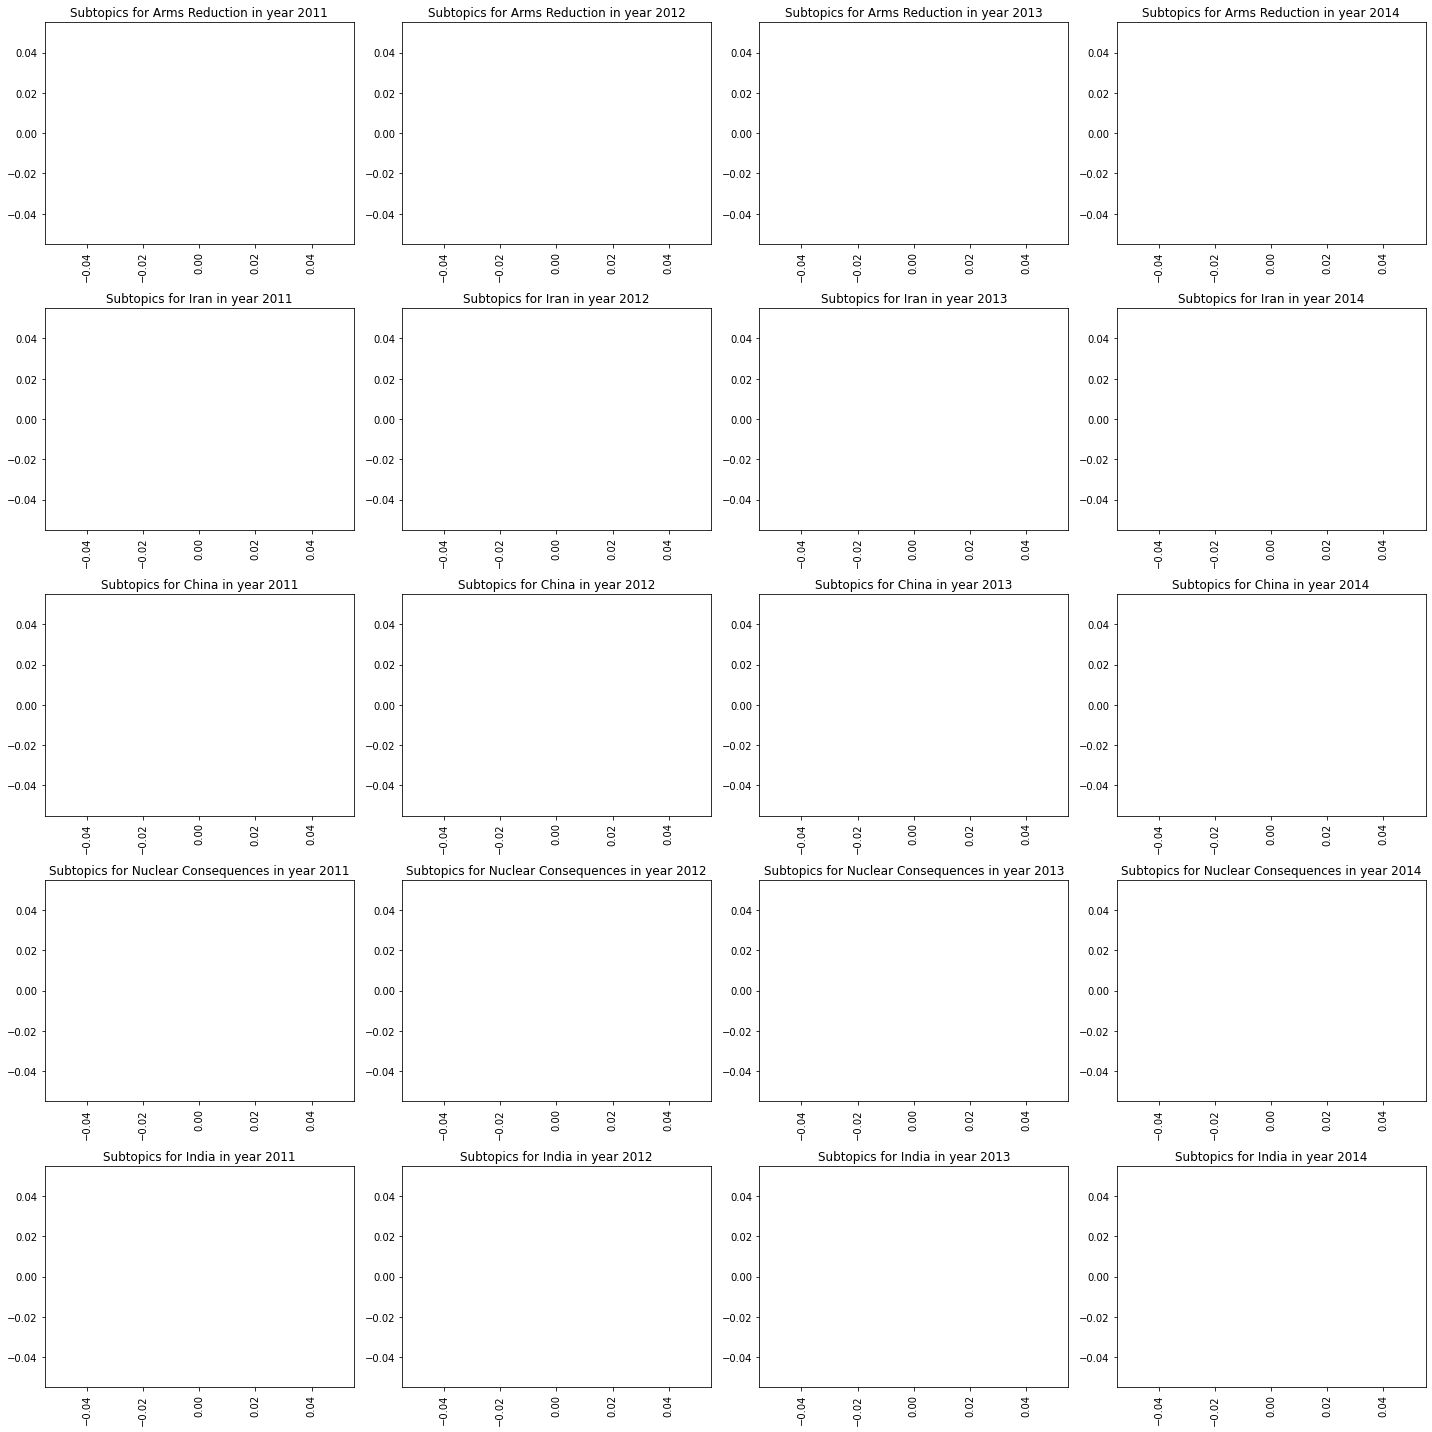

In [50]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i+10]
        year = years[j]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

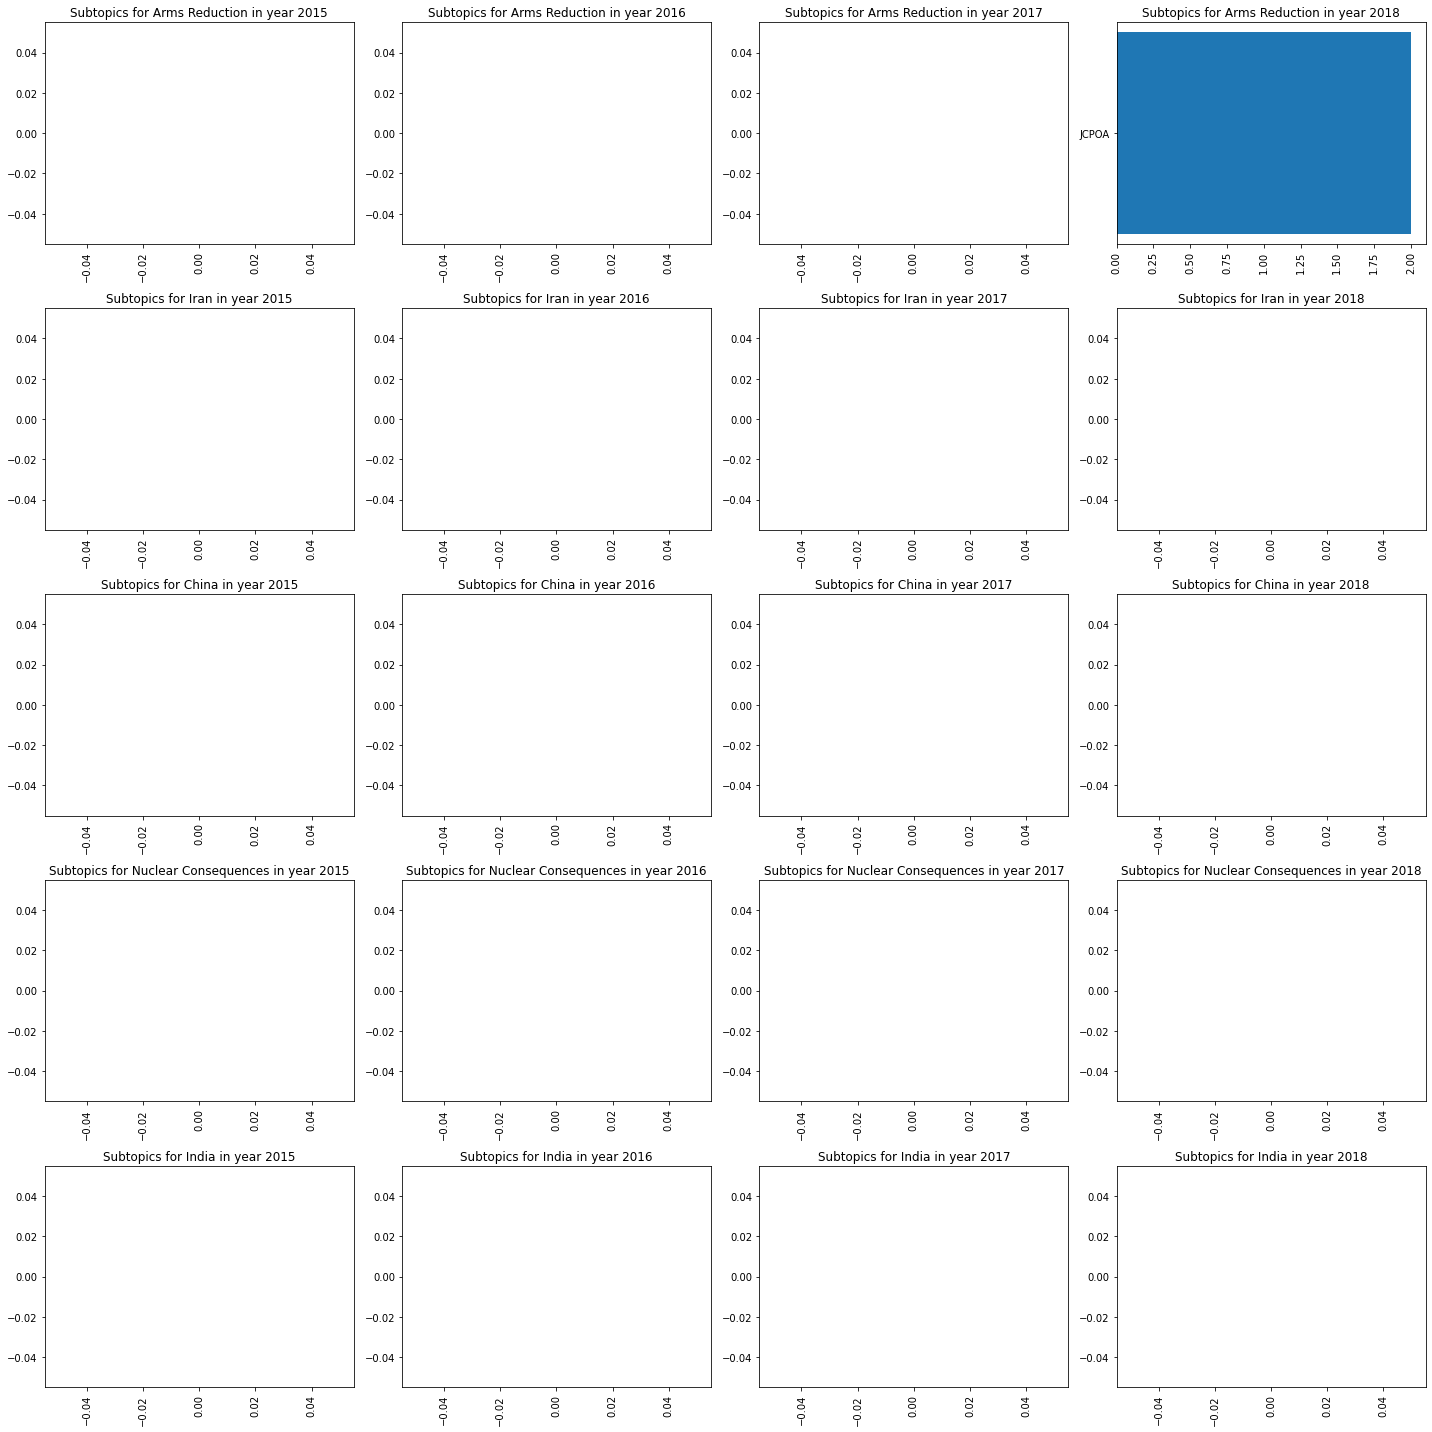

In [51]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i+10]
        year = years[j+4]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

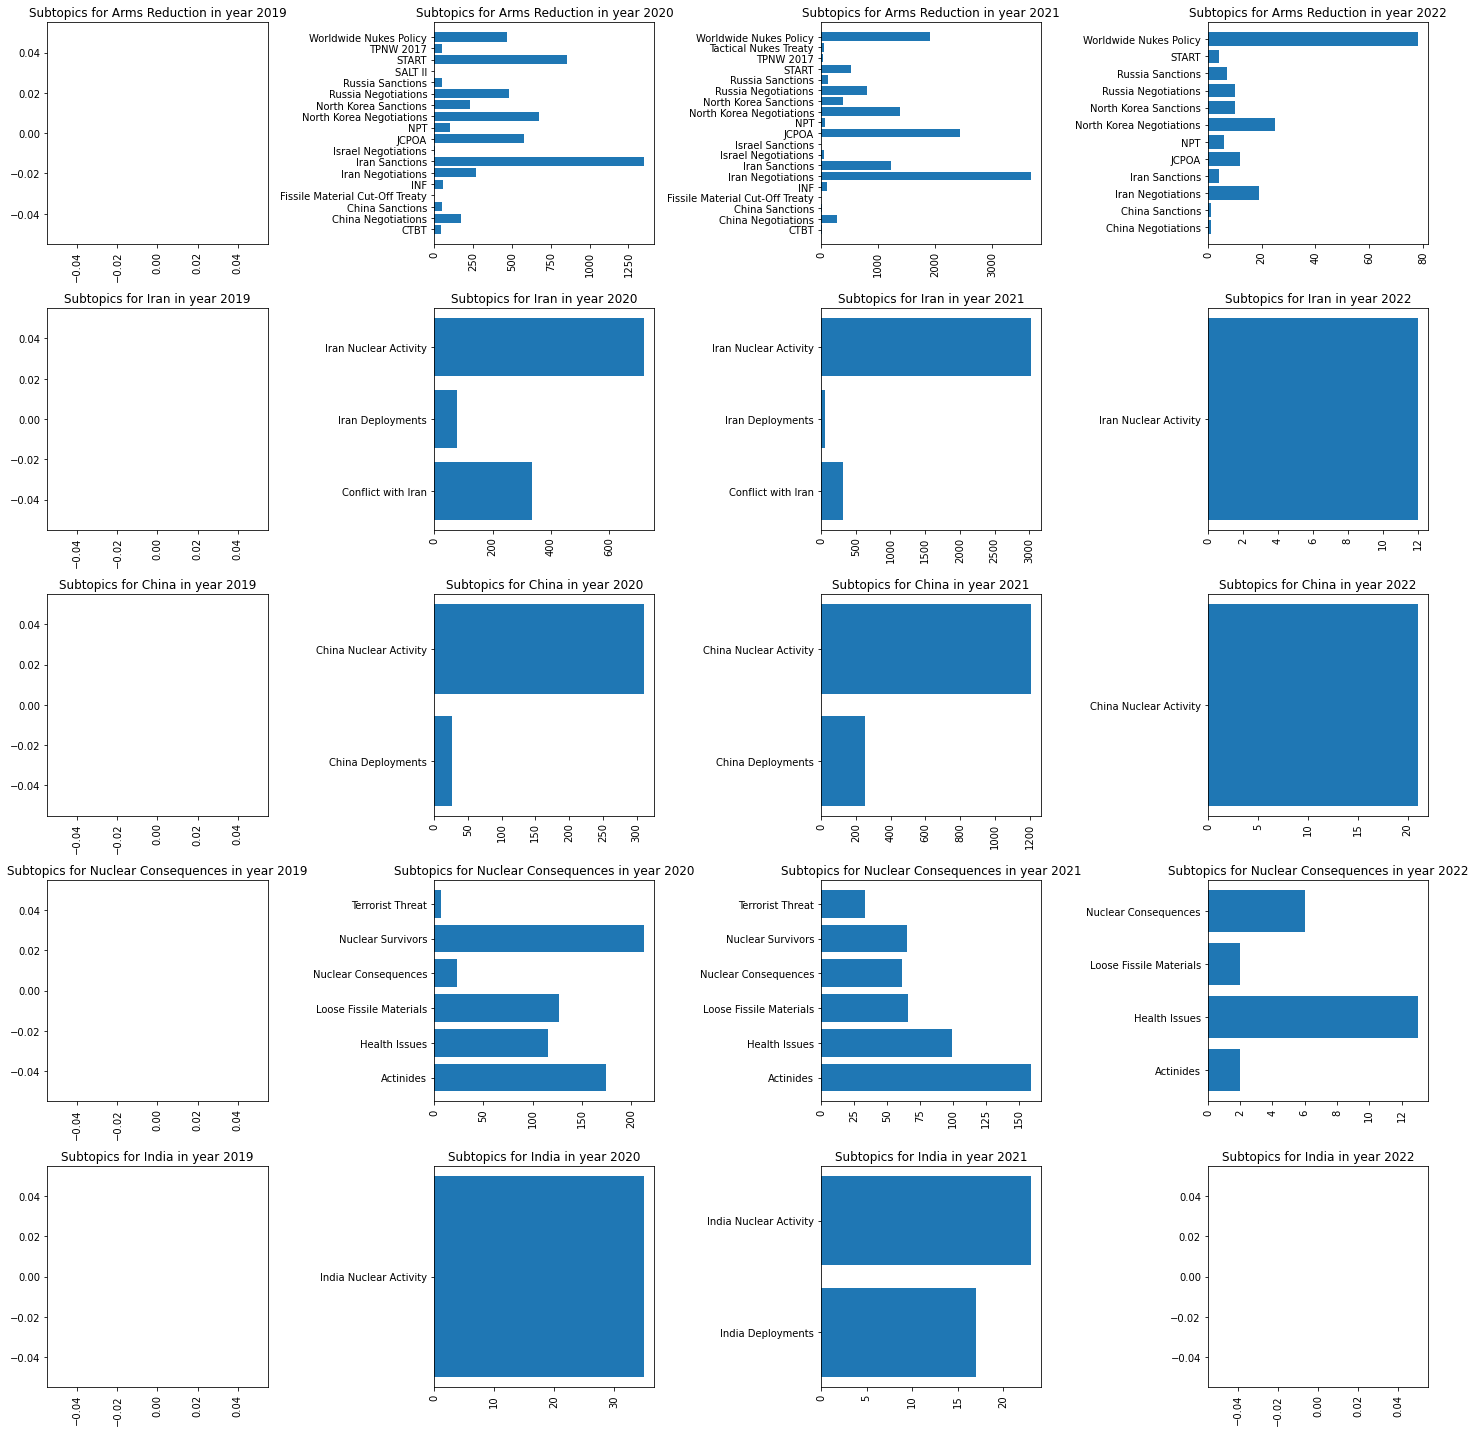

In [52]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(len(topics[:5])):
    for j in range(len(years[:4])):
        
        topic = topics[i+10]
        year = years[j+8]
        
        df_yr_topic = topic_data[(topic_data["year"] == year) & (topic_data["Messages"] == topic)]
        df_yr_topic = df_yr_topic[["Submessages", "Article ID"]].groupby("Submessages").count()
#         df_yr_topic.plot(kind = 'bar')
        
        axs[i, j].barh(df_yr_topic.index, df_yr_topic["Article ID"])
        axs[i, j].set_title("Subtopics for " + topic + " in year " + year)

        axs[i, j].tick_params(axis='x', labelrotation=90)

fig.tight_layout()

## Try to Focus analysis on New Schema

In [53]:
topic_data["year"] = topic_data["year"].apply(int)
topic_data["month"] = topic_data["month"].apply(int)

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/1187181405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_data["year"] = topic_data["year"].apply(int)
/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/1187181405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_data["month"] = topic_data["month"].apply(int)


In [63]:
topic_data_old_schema = topic_data[(topic_data["year"] < 2020) & (topic_data["month"] <= 3)]

<AxesSubplot:xlabel='Messages'>

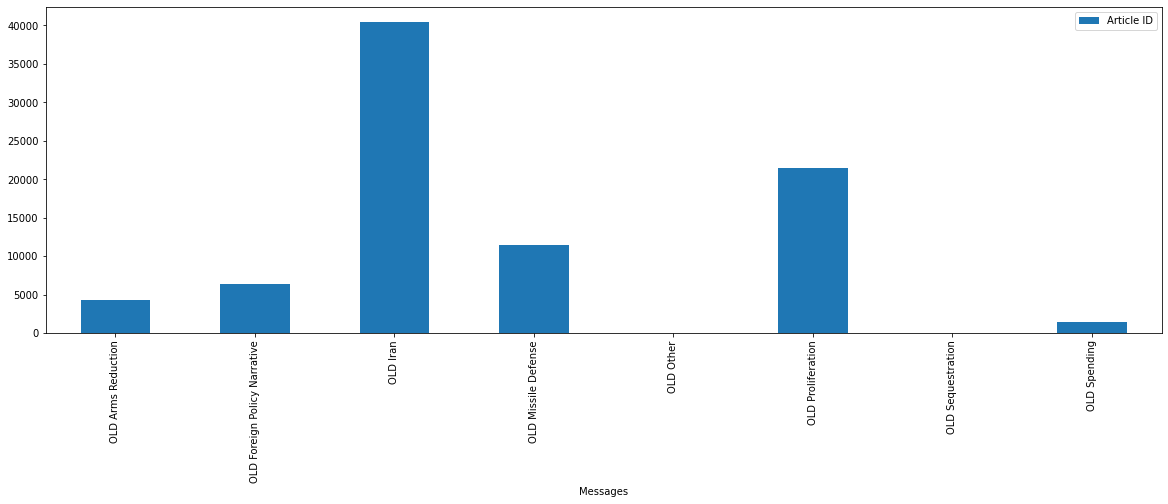

In [64]:
topic_data_old_schema[["Messages", "Article ID"]].groupby(["Messages"]).count().plot(kind = "bar", figsize = (20, 6))

<AxesSubplot:xlabel='Submessages'>

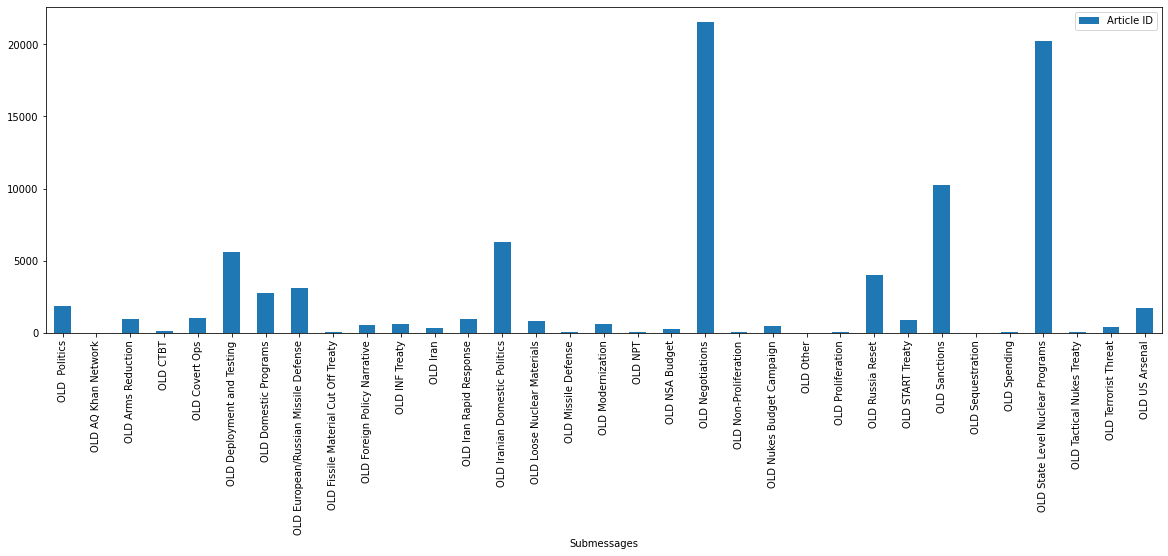

In [65]:
topic_data_old_schema[["Submessages", "Article ID"]].groupby(["Submessages"]).count().plot(kind = "bar", figsize = (20, 6))

In [66]:
topic_data_new_schema = topic_data[(topic_data["year"] >= 2020) & (topic_data["month"] >= 4)]

<AxesSubplot:xlabel='Messages'>

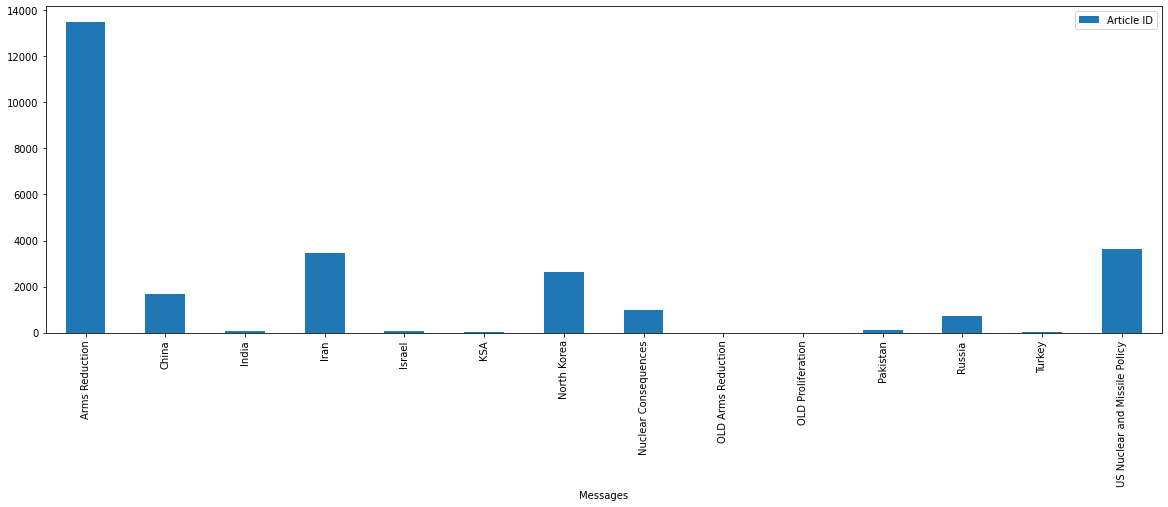

In [67]:
topic_data_new_schema[["Messages", "Article ID"]].groupby(["Messages"]).count().plot(kind = "bar", figsize = (20, 6))

<AxesSubplot:xlabel='Submessages'>

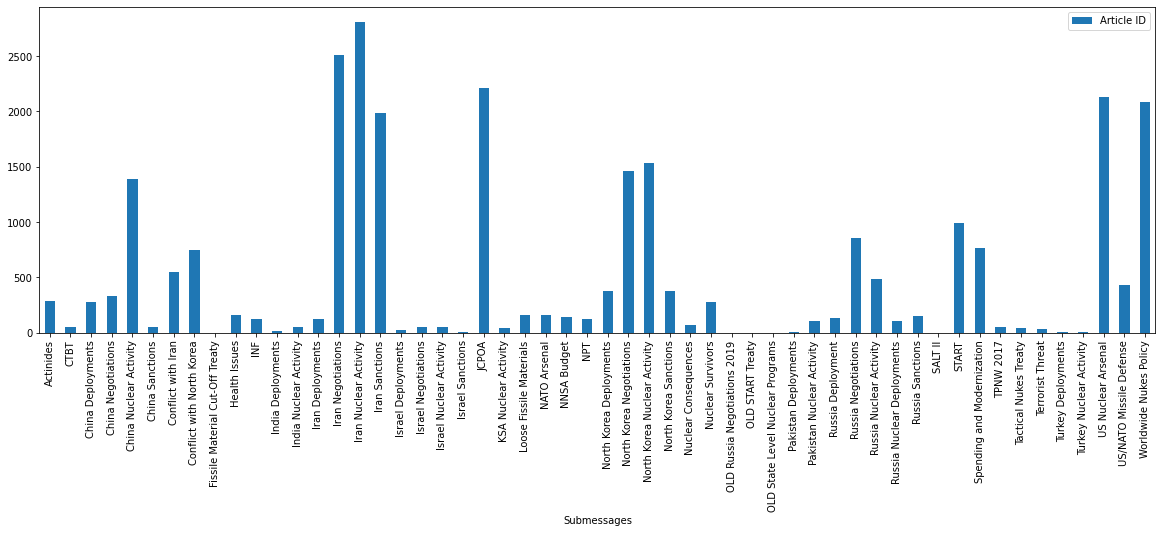

In [68]:
topic_data_new_schema[["Submessages", "Article ID"]].groupby(["Submessages"]).count().plot(kind = "bar", figsize = (20, 6))

## Analysis of Message Groupings

In [69]:
message_counts = topic_data[["Article ID", "Messages"]].groupby(["Messages"]).count()
message_counts

,Article ID
Messages,
Arms Reduction,18692
China,1821
India,75
Iran,4544
Israel,99
KSA,45
North Korea,3853
Nuclear Consequences,1166
OLD Arms Reduction,17638


### Group into Country 

In [80]:
def is_country(msg):
    countries = ["China", "India", "Iran", "Israel", "North Korea", "OLD Iran", "Pakistan", "Russia", "Turkey", "KSA"]
    return msg in countries

topic_data["is_country"] = topic_data["Messages"].apply(is_country)

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/1202769632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_data["is_country"] = topic_data["Messages"].apply(is_country)


In [81]:
country_data = topic_data[topic_data["is_country"] == True]
country_data.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,QText,Media Name,Media Medium,Article Issues,Custom Group,year,month,day,is_country
3853,2016-07-14,5157643,"A year after nuclear deal, taking stock of a...",8910511,News,Neutral,OLD Iran,OLD Negotiations,Neutral,The benefits mean Iranians were spared an econ...,Arizona Republic,Print,NaN,NaN,2016,7,14,True
3854,2016-07-14,5157643,"A year after nuclear deal, taking stock of a...",8910526,News,Neutral,OLD Iran,OLD Negotiations,Neutral,"the U.S. has ""no indication"" those efforts suc...",Arizona Republic,Print,NaN,NaN,2016,7,14,True
3855,2016-07-14,5157643,"A year after nuclear deal, taking stock of a...",8910521,News,Neutral,OLD Iran,OLD Sanctions,Neutral,Banks and businesses that use the U.S. financi...,Arizona Republic,Print,NaN,NaN,2016,7,14,True
3856,2016-07-14,5157643,"A year after nuclear deal, taking stock of a...",8910520,News,Neutral,OLD Iran,OLD Negotiations,Positive,the deal made the world safer,Arizona Republic,Print,NaN,NaN,2016,7,14,True
3859,2016-07-14,5157643,"A year after nuclear deal, taking stock of a...",8910524,News,Neutral,OLD Iran,OLD Negotiations,Neutral,Iran's economy grew by 0.7% since the deal was...,Arizona Republic,Print,NaN,NaN,2016,7,14,True


In [82]:
country_data["Messages"] = country_data["Messages"].str.replace("OLD Iran", "Iran")
country_data[["Quote ID", "Messages"]].groupby("Messages").count()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/849289641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["Messages"] = country_data["Messages"].str.replace("OLD Iran", "Iran")


,Quote ID
Messages,
China,1821
India,75
Iran,164296
Israel,99
KSA,45
North Korea,3853
Pakistan,115
Russia,827
Turkey,9


In [95]:
other_data = topic_data[topic_data["is_country"] == False]
other_data.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,QText,Media Name,Media Medium,Article Issues,Custom Group,year,month,day,is_country
0,2018-01-10,3759306,North Korea makes deals and threats,7023849,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,the nuclear issue was separate and that Pyongy...,Washington Post,NaN,NaN,NaN,2018,1,10,False
1,2018-01-10,3759306,North Korea makes deals and threats,7023842,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,"the country's ""cutting-edge"" nuclear weapons a...",Washington Post,NaN,NaN,NaN,2018,1,10,False
2,2018-01-10,3759306,North Korea makes deals and threats,7023839,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,That was not on the table,Washington Post,NaN,NaN,NaN,2018,1,10,False
3,2018-01-10,3759306,North Korea makes deals and threats,7023833,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,"All our cutting-edge weapons, including our hy...",Washington Post,NaN,NaN,NaN,2018,1,10,False
4,2018-01-10,3759306,North Korea makes deals and threats,7023846,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,"despite the quibbles, Tuesday's discussions we...",Washington Post,NaN,NaN,NaN,2018,1,10,False


In [96]:
other_data[["Quote ID", "Messages"]].groupby("Messages").count()

,Quote ID
Messages,
Arms Reduction,18692
Nuclear Consequences,1166
OLD Arms Reduction,17638
OLD Foreign Policy Narrative,18751
OLD Missile Defense,40638
OLD Other,779
OLD Proliferation,95816
OLD Sequestration,94
OLD Spending,5626


In [97]:
other_data["Messages"] = other_data["Messages"].str.replace("OLD Arms Reduction", "Arms Reduction")
other_data["Messages"] = other_data["Messages"].str.replace("OLD Missile Defense", "Missile Policy")
other_data["Messages"] = other_data["Messages"].str.replace("US Nuclear and Missile Policy", "Missile Policy")

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/2114244704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data["Messages"] = other_data["Messages"].str.replace("OLD Arms Reduction", "Arms Reduction")
/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_8842/2114244704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data["Messages"] = other_data["Messages"].str.replace("OLD Missile Defense", "Missile Policy")
/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykerne

In [98]:
other_data[["Quote ID", "Messages"]].groupby("Messages").count()

,Quote ID
Messages,
Arms Reduction,36330
Missile Policy,45334
Nuclear Consequences,1166
OLD Foreign Policy Narrative,18751
OLD Other,779
OLD Proliferation,95816
OLD Sequestration,94
OLD Spending,5626


In [99]:
# Probably should drop other and sequestration since they would be difficult to categorize later
other_data = other_data[other_data["Messages"] != "OLD Other"]
other_data = other_data[other_data["Messages"] != "OLD Sequestration"]
other_data.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,QText,Media Name,Media Medium,Article Issues,Custom Group,year,month,day,is_country
0,2018-01-10,3759306,North Korea makes deals and threats,7023849,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,the nuclear issue was separate and that Pyongy...,Washington Post,NaN,NaN,NaN,2018,1,10,False
1,2018-01-10,3759306,North Korea makes deals and threats,7023842,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,"the country's ""cutting-edge"" nuclear weapons a...",Washington Post,NaN,NaN,NaN,2018,1,10,False
2,2018-01-10,3759306,North Korea makes deals and threats,7023839,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,That was not on the table,Washington Post,NaN,NaN,NaN,2018,1,10,False
3,2018-01-10,3759306,North Korea makes deals and threats,7023833,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,"All our cutting-edge weapons, including our hy...",Washington Post,NaN,NaN,NaN,2018,1,10,False
4,2018-01-10,3759306,North Korea makes deals and threats,7023846,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,"despite the quibbles, Tuesday's discussions we...",Washington Post,NaN,NaN,NaN,2018,1,10,False


In [102]:
other_data[["Quote ID", "Messages"]].groupby("Messages").count()

,Quote ID
Messages,
Arms Reduction,36330
Missile Policy,45334
Nuclear Consequences,1166
OLD Foreign Policy Narrative,18751
OLD Proliferation,95816
OLD Spending,5626


<AxesSubplot:xlabel='Messages'>

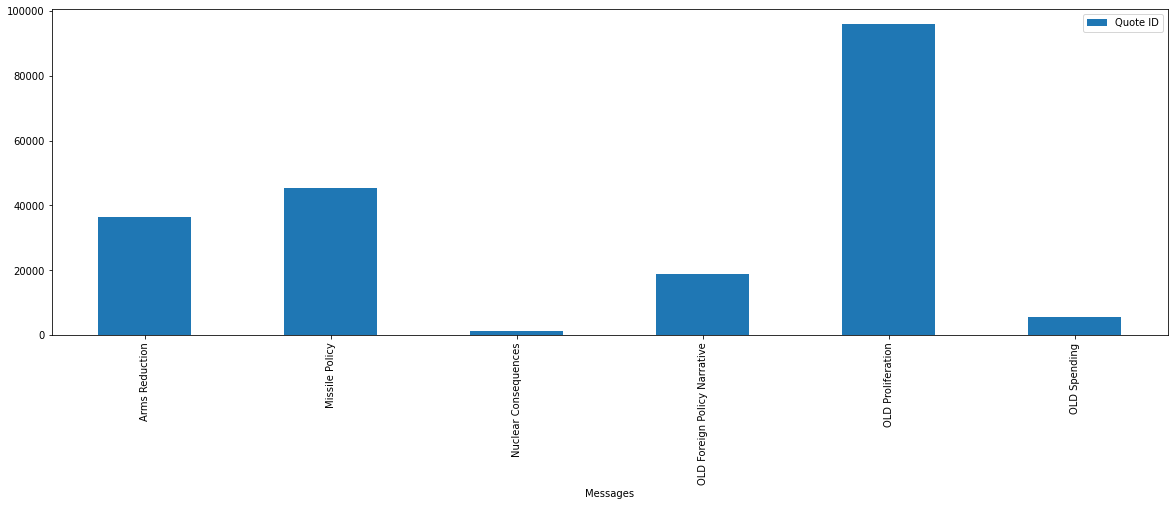

In [106]:
other_data[["Quote ID", "Messages"]].groupby("Messages").count().plot(kind = "bar", figsize = (20, 6))

In [107]:
country_data[["Quote ID", "Messages"]].groupby("Messages").count()

,Quote ID
Messages,
China,1821
India,75
Iran,164296
Israel,99
KSA,45
North Korea,3853
Pakistan,115
Russia,827
Turkey,9


<AxesSubplot:xlabel='Messages'>

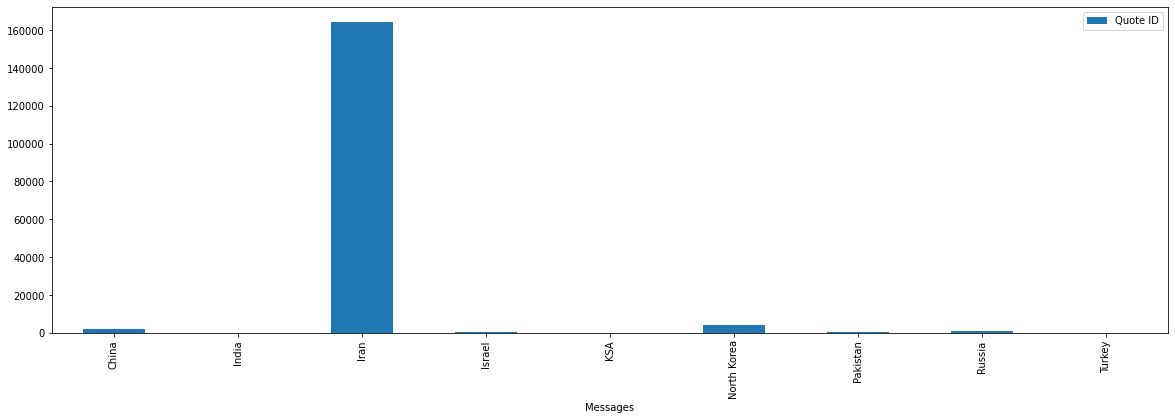

In [108]:
country_data[["Quote ID", "Messages"]].groupby("Messages").count().plot(kind = "bar", figsize = (20, 6))

In [109]:
topic_data[["Quote ID", "is_country"]].groupby("is_country").count()

,Quote ID
is_country,
False,207565
True,171140


#### Thoughts and questions: 
- Can definitely separate into country and not-country-specific
- within country, heavy focus on Iran, some countries have very few data points, 
    - should we just not classify these countries? 
    - It might be easy to ignore turkey but it would be hard to draw the line with whether we should try to classify Russia as it has fewer data points compared to other categories but is still significant 
- within the non-country-specific data, i feel that I'm having difficulty identifying what each of these labels means and how to potentially group them together? 
    - for example, should Missile Defense, US Nuclear and Missile Policy, OLD Foreign Policy Narrative all be in the same group? 
- in general, do we want groups of similar size? 
- and where do we draw the line for when we should just drop a group? 
    - perhaps try statistical analysis about average group size and then using standard deviation to locate outliers